In [279]:
import numpy as np
import pandas as pd 

In [280]:
#הורדת עמודות לא רלוונטיות לניתוח הדאטה
desc = pd.read_csv('games_description.csv')
desc = desc.drop(columns=['short_description'])
desc.head()

,name,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,Black Myth: Wukong,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931
1,Counter-Strike 2,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990
2,"Warhammer 40,000: Space Marine 2","['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920
3,Cyberpunk 2077,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124
4,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741


In [281]:
rank = pd.read_csv('games_ranking.csv')
rank.head()

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5


In [282]:
desc.shape

(290, 10)

In [283]:
desc.columns

Index(['name', 'genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'release_date', 'developer',
       'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')

In [284]:
desc.axes

[RangeIndex(start=0, stop=290, step=1),
 Index(['name', 'genres', 'minimum_system_requirement',
        'recommend_system_requirement', 'release_date', 'developer',
        'publisher', 'overall_player_rating',
        'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
       dtype='object')]

In [285]:
desc.index

RangeIndex(start=0, stop=290, step=1)

In [286]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   genres                                   290 non-null    object
 2   minimum_system_requirement               290 non-null    object
 3   recommend_system_requirement             290 non-null    object
 4   release_date                             290 non-null    object
 5   developer                                290 non-null    object
 6   publisher                                290 non-null    object
 7   overall_player_rating                    290 non-null    object
 8   number_of_reviews_from_purchased_people  290 non-null    object
 9   number_of_english_reviews                290 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 22.8+ KB


In [287]:
desc.nunique()

name                                       290
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

### **שלב 1: טעינת הנתונים וסטנדרטיזציה של עמודת המפתח (Pre-Merge Cleaning)**

Rename the name column in the description table to be identical to the name column in the rank table:

In [288]:
#שינוי שם עמודת המפתח - שם המשחק שיהיה זהה בשץי הטבלאות 
desc = desc.rename(columns={'name': 'game_name'})


 Whitespace Removal: (Data standarization before merge):

In [289]:
#יישום הסרת רווחים בעמודת השמות בטבלת הדירוג
rank['game_name'] = rank['game_name'].str.strip()

In [290]:
#יישום הסרת רווחים בעמודת השמות בטבלת התיאור
desc['game_name'] = desc['game_name'].str.strip()

Case Normalization (Data standarization before merge):


In [291]:
desc['game_name'] = desc['game_name'].str.lower()

In [292]:
rank['game_name'] = rank['game_name'].str.lower()

In [293]:
rank.shape

(672, 4)

In [294]:
rank.columns

Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')

In [295]:
rank.axes

[RangeIndex(start=0, stop=672, step=1),
 Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')]

In [296]:
rank.index

RangeIndex(start=0, stop=672, step=1)

In [297]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  672 non-null    object
 1   genre      672 non-null    object
 2   rank_type  672 non-null    object
 3   rank       672 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.1+ KB


In [298]:
rank.nunique()

game_name    303
genre          6
rank_type      3
rank          40
dtype: int64

### **שלב 2 : איחוד דאטות עי שימוש  merge:**

In [299]:
# Assuming desc and rank are steam_df and the other relevant dataframe, respectively.

# rank is a dataframe from cell 3 or 13 (wide, with genre, rank_type, rank)
# We'll call it `rank_df` as a name, but in your context you may need to adjust

# If not already loaded, you probably have:
# rank_df = pd.read_csv("...") or loaded from some code earlier

# Here we merge steam_df and rank_df according to the structure of rank_df (which has 'game_name', 'genre', 'rank_type', 'rank')
# We perform a left merge from rank_df to steam_df to keep the order and rows of rank_df

merged_df = rank.merge(desc, left_on='game_name', right_on='game_name', how='left')
merged_df.head()


,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0


In [300]:
print(merged_df.columns)

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')


In [301]:
merged_df.nunique()

game_name                                  303
genre                                        6
rank_type                                    3
rank                                        40
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

In [302]:
# merged_df.sort_values(merged_df['game_name'], ascending=True)
# This is incorrect because `by` should be a column label or a list of column labels, not a Series.
# The correct usage:
#merged_df.sort_values(by='game_name', ascending=True)

In [303]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                672 non-null    object 
 1   genre                                    672 non-null    object 
 2   rank_type                                672 non-null    object 
 3   rank                                     672 non-null    int64  
 4   genres                                   656 non-null    object 
 5   minimum_system_requirement               656 non-null    object 
 6   recommend_system_requirement             656 non-null    object 
 7   release_date                             656 non-null    object 
 8   developer                                656 non-null    object 
 9   publisher                                656 non-null    object 
 10  overall_player_rating                    656 non-n

### **שלב 3: טיפול בערכים החסרים הנסתרים בעמודת genres (Post-Merge Cleaning):**

In [304]:
# 1. המרת מחרוזות ריקות או רווחים ל-NaN אמיתי
# מחרוזות ריקות
merged_df['genres'] = merged_df['genres'].replace('', np.nan)
# מחרוזות המכילות רווחים בלבד
merged_df['genres'].replace(r'^\s*$', np.nan, regex=True)

0      ['FPS', 'Shooter', 'Multiplayer', 'Competitive...
1      ['Warhammer 40K', 'Action', 'Third-Person Shoo...
2      ['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...
3      ['Mythology', 'Action RPG', 'Action', 'RPG', '...
4      ['Souls-like', 'Dark Fantasy', 'Open World', '...
                             ...                        
667    ['Simulation', 'Racing', 'Sports', 'Motocross'...
668    ['Simulation', 'Racing', 'Sports', 'Motorbike'...
669    ['Racing', 'Sports', 'Simulation', 'Motorbike'...
670    ['Racing', 'Action', 'Indie', 'Sports', 'Adven...
671    ['Simulation', 'Adventure', 'Sports', 'Casual'...
Name: genres, Length: 672, dtype: object

In [305]:
# 2. מילוי ערכי NaN: מילוי הז'אנרים החסרים ב-'Unknown'
# פעולה זו נדרשת כדי למנוע כשלים בשלב הפיצול
merged_df['genres'] = merged_df['genres'].fillna('Unknown')

### **שלב 4: פיצול והכפלת שורות הז'אנר (Exploding Genres):**

In [306]:
 #פיצול חרוזת הז'אנרים לפי ז'אנר
# פיצול לפי פסיק, תוך התעלמות מרווחים לפני ואחרי הפסיק
merged_df['genres_list'] = merged_df['genres'].str.split(r',\s*')
merged_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,genres_list
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,"[['FPS', 'Shooter', 'Multiplayer', 'Competitiv..."
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,"[['Warhammer 40K', 'Action', 'Third-Person Sho..."
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,"[['Cyberpunk', 'Open World', 'Nudity', 'RPG', ..."
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0,"[['Mythology', 'Action RPG', 'Action', 'RPG', ..."
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0,"[['Souls-like', 'Dark Fantasy', 'Open World', ..."


In [307]:
# 2. הכפלת השורות (Explode)
merged_df_new = merged_df.explode('genres_list')
merged_df_new  = merged_df_new.rename(columns={'genres_list': 'normalize'})

In [308]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12666 entries, 0 to 671
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                12666 non-null  object 
 1   genre                                    12666 non-null  object 
 2   rank_type                                12666 non-null  object 
 3   rank                                     12666 non-null  int64  
 4   genres                                   12666 non-null  object 
 5   minimum_system_requirement               12650 non-null  object 
 6   recommend_system_requirement             12650 non-null  object 
 7   release_date                             12650 non-null  object 
 8   developer                                12650 non-null  object 
 9   publisher                                12650 non-null  object 
 10  overall_player_rating                    12650 non-nu

In [309]:
# 3. סטנדרטיזציה סופית של הז'אנרים המפוצלים (אותיות קטנות והסרת רווחים)
# This line is incorrect because it tries to assign a non-existent column 'normalized_genre' to itself.
# Instead, you should create 'normalized_genre' from the appropriate column, typically by standardizing the split genre values.
# For standardizing (lowercase & strip) the exploded genre column, use:
merged_df_new['normalized_genre'] = merged_df_new['normalize'].str.lower().str.strip()

In [310]:
merged_df_new.loc[:, 'genre']

0               Action
0               Action
0               Action
0               Action
0               Action
            ...       
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
Name: genre, Length: 12666, dtype: object

In [311]:
merged_df_new.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,['FPS',['fps'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Shooter','shooter'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Multiplayer','multiplayer'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Competitive','competitive'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'


### **שלב 5: סינון לז'אנרי הליבה (Final Filtering):**

In [312]:
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports'", "'racing'"]
# Check which unique values are present in normalized_genre vs core_genres to debug filtering
print("Unique normalized_genre values:\n", merged_df_new['normalized_genre'].unique())
print("Core genres:", core_genres)
print("Intersection (matches):", set(merged_df_new['normalized_genre'].unique()) & set(core_genres))

# See top values by frequency
print("Top genre frequencies after normalization:")
print(merged_df_new['normalized_genre'].value_counts())

# Filtering as before (for reference, can comment/uncomment for real run)
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

Unique normalized_genre values:
 ["['fps'" "'shooter'" "'multiplayer'" "'competitive'" "'action'"
 "'team-based'" "'esports'" "'tactical'" "'first-person'" "'pvp'"
 "'online co-op'" "'co-op'" "'strategy'" "'military'" "'war'"
 "'difficult'" "'trading'" "'realistic'" "'fast-paced'" "'moddable']"
 "['warhammer 40k'" "'third-person shooter'" "'adventure'"
 "'action-adventure'" "'pve'" "'third person'" "'wargame'" "'sci-fi'"
 "'3d'" "'narration'" "'fantasy'" "'space'" "'singleplayer'" "'cinematic'"
 "'futuristic']" "['cyberpunk'" "'open world'" "'nudity'" "'rpg'"
 "'futuristic'" "'fps'" "'mature'" "'story rich'" "'atmospheric'"
 "'exploration'" "'violent'" "'great soundtrack'" "'action rpg'"
 "'character customization'" "'immersive sim']" "['mythology'"
 "'souls-like'" "'combat'" "'drama'" "'dark fantasy'" "'hack and slash'"
 "'music'" "'violent']" "['souls-like'" "'family friendly']" "['survival'"
 "'battle royale'" "'early access'" "'simulation'" "'stealth']" 'unknown'
 "['free to play'"

In [313]:
# Yes, you can merge "sports" and "racing" into one genre label, e.g. "'sports & racing'", in the normalized_genre column. 
# This is usually done by replacing both "'sports'" and "'racing'" values with "'sports & racing'". Here is the code to do that:

# Merge "'sports'" and "'racing'" into "'sports & racing'" in normalized_genre column
merged_df_new['normalized_genre'] = merged_df_new['normalized_genre'].replace(["'sports'", "'racing'"], "'sports & racing'")

# After the merge, update the core_genres list and filter again accordingly
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports & racing'"]
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]


In [314]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [315]:
#  סינון הנתונים כן שיישארו רק הרשומות הרלוונטיות ל-6 הז'אנרים המרכזיים שהוגדרו בפרויקט
#core_genres = ['Action', 'Adventure', 'Role-Playing', 'Strategy', 'Simulation', 'Sports & Racing']

# סינון ה-DataFrame הסופי
#final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

In [316]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [317]:
# Display first few rows and shape to diagnose why final_df might be empty
final_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Sports','sports & racing'
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Sports','sports & racing'


In [318]:
print(final_df['normalized_genre'].unique())

["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]


In [319]:
# Check if 'sports & racing' is present and debug why it is missing
print("All unique genres in final_df:", final_df['normalized_genre'].unique())
print(final_df['normalized_genre'].value_counts())

if "'sports & racing'" not in final_df['normalized_genre'].unique():
    print("WARNING: 'sports & racing' not found in normalized_genre!")
    print("Example values from merged_df_new['normalized_genre'] for inspection:")
    print(merged_df_new['normalized_genre'].unique())
    print("Original 'genre' column sample:")
    print(final_df['genre'].unique())
    print("Unique normalized genres (full set):")
    print(set(merged_df_new['normalized_genre'].unique()))

All unique genres in final_df: ["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]
normalized_genre
'action'             351
'adventure'          299
'simulation'         258
'rpg'                219
'strategy'           169
'sports & racing'    146
Name: count, dtype: int64


In [320]:

print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [321]:
# בדיקה: כמה רשומות נותרו לאחר סינון הז'אנרים שאינם רלוונטיים?
print(f"Final rows for analysis: {len(final_df)}")

Final rows for analysis: 1442


For EDA on merged_df:
Overview: Use .head(), .info(), and .describe() for understanding size, types, and distributions.
Missing Values: Check missing values with .isnull().sum().
Duplicates: Check for duplicates if relevant.
Value Counts: Examine .value_counts() for categorical columns like genre, rank_type, overall_player_rating.
Distributions: Plot histograms/boxplots for numeric columns (rank, review numbers).
Correlations: Use .corr() and visualizations (heatmap) for relationships.
Group/Compare: Group by genre or rank_type to compare aggregates.
Outliers: Check for outliers in numeric columns.
Reason: These steps reveal data quality, structure, key trends, and potential insights.

**EDA on merged_df:**

**final_df  DataFrame is only for genre based-calculation:** זוהי טבלה "מנופחת" מכיוון שמכילה פיצול של משחקים לפי הז'אנרים העיקריים ולכן יש משחקים שמופיעים יותר מפעם אחת

In [322]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'


In [323]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [324]:
print(final_df['genres'].isnull().sum())

0


In [325]:
final_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre'],
      dtype='object')

In [326]:
final_df.describe().round(2)

,rank,number_of_english_reviews
count,1442.00,1442.00
mean,19.46,114202.84
std,11.35,210659.34
min,1.00,0.00
25%,10.00,13860.00
50%,19.00,44785.00
75%,29.00,127592.25
max,40.00,2258990.00


In [327]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

## **Data Cleaning and Preparation - pre-EDA:**

### **שלב 1 - טיפול באנומליות שליליות וערכים חסרים:**

In [328]:
# 1. המרת הערכים השליליים לערכים ריקים (NaN), 
# מאחר ותצפיות לא יכולות להיות בעלות ערך שלילי נתייחס למספרים כאל Placeholders:
# אנו ממירים את העמודה לפורמט מספרי כדי שנוכל לזהות ערכים שליליים, עם פרמטר errors='coerce' 
# לטיפול בנתונים שאינם מספריים.
final_df.loc[:,'number_of_reviews_from_purchased_people'] = pd.to_numeric(
    final_df['number_of_reviews_from_purchased_people'], errors='coerce')

In [329]:
#2.  זיהוי והמרת כל הערכים הקטנים מ-0 ל-NaN
final_df.loc[final_df['number_of_reviews_from_purchased_people'] < 0, 
             'number_of_reviews_from_purchased_people'] = np.nan

In [330]:
# 3. השלמת ערכי NaN שנוצרו עם 0 (Imputation)
# The issue: fillna(0) returns a copy and does not modify the DataFrame in-place unless inplace=True is set or reassignment is used.
# The correct way is to reassign the result back, or use inplace=True:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_4616\2038491476.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)


In [331]:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].astype(int)

### **שלב 2: המרת סוגי נתונים (Dtypes Conversion):**

**המרת עמודת התאריך ואת עמודת ספירת הביקורות האחרת לפורמטים המתאימים:**

In [332]:
# 1. המרת תאריך: המרת 'release_date' מ-object ל-datetime
# העמודה release_date מסווגת כ-object כרגע [7].
# The below line fails because some date strings do not have year information (e.g. "Nov-18"),
# which causes pandas to throw "Out of bounds nanosecond timestamp" errors.
# To handle this, we can use errors='coerce' to convert unparseable dates to NaT and optionally inspect them.
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')

C:\Users\ofirs\AppData\Local\Temp\ipykernel_4616\402040055.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')


In [333]:
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'])

In [334]:
final_df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                         int64
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                  float64
normalize                                   object
normalized_genre                            object
dtype: object

In [335]:
final_df['release_date'].isna().sum()

np.int64(0)

In [336]:
final_df['number_of_reviews_from_purchased_people'].isna().sum()

np.int64(0)

In [337]:
# 2. המרת ספירה: המרת 'number_of_english_reviews' מ-float64 ל-int64
# העמודה מוגדרת כ-float64 [7], אך היא מייצגת ספירה
final_df.loc[:,'number_of_english_reviews'] = final_df['number_of_english_reviews'].astype(int)

In [338]:
final_df['number_of_english_reviews'].isna().sum()

np.int64(0)

In [339]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [429]:
#overall_player_rating - defined as 'object', shoukd be defined as int:
# using mapping_dict to determine rating_order (mapping_dict = rating_map):
rating_order = {'Very Negative':1, 'Mostly Negative':2, 'Mixed':3, 'Mostly Positive':4, 'Positive':5, 'Very Positive':6, 'Overwhelmingly Positive':7}
final_df.loc[:,'overall_player_rating_numeric'] = final_df['overall_player_rating'].map(rating_order).round(0)

In [341]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Strategy','strategy',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0


In [342]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [343]:
final_df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                         int64
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                  float64
normalize                                   object
normalized_genre                            object
overall_player_rating_numeric              float64
dtype: object

**Final Step before EDA - creating data frame with no duplicates (for calculation based on other prameters besides genre):**

In [344]:
unique_game_df = final_df.drop_duplicates(subset = ['game_name']).copy()

In [345]:
unique_game_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19 00:00:00,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25 00:00:00,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0


In [346]:
unique_game_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19 00:00:00,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25 00:00:00,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,mxgp pro,Sports & Racing,Review,36,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2018-06-29 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,0,433.0,'Racing','sports & racing',6.0
668,mxgp 2019 - the official motocross videogame,Sports & Racing,Review,37,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2019-08-27 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,772,446.0,'Racing','sports & racing',6.0
669,ride 2,Sports & Racing,Review,38,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,2016-07-10 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,2008,1045.0,'Sports','sports & racing',6.0
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",2020-04-12 00:00:00,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Action','action',6.0


In [347]:
unique_game_df['release_date'] = pd.to_datetime(unique_game_df['release_date'])

In [348]:
unique_game_df.dtypes

game_name                                          object
genre                                              object
rank_type                                          object
rank                                                int64
genres                                             object
minimum_system_requirement                         object
recommend_system_requirement                       object
release_date                               datetime64[ns]
developer                                          object
publisher                                          object
overall_player_rating                              object
number_of_reviews_from_purchased_people            object
number_of_english_reviews                         float64
normalize                                          object
normalized_genre                                   object
overall_player_rating_numeric                     float64
dtype: object

In [349]:
# Let's investigate why only 276 games remain after cleaning, starting from the original 290.
print("Original number of games in raw data (game_description):", len(desc))
print("Number of games in unique_game_df:", len(unique_game_df))

# Let's see which game_names are missing after cleaning:
original_names = set(desc['game_name'].str.lower().str.strip())
cleaned_names = set(unique_game_df['game_name'].str.lower().str.strip())
missing_after_cleaning = original_names - cleaned_names

print(f"Number of games missing after cleaning: {len(missing_after_cleaning)}")
if missing_after_cleaning:
    print("Games lost after cleaning:")
    for name in sorted(missing_after_cleaning):
        print(name)

# Let's also check for any NaN in 'game_name' or other issues in unique_game_df
print("Number of NaN game_names in unique_game_df:", unique_game_df['game_name'].isna().sum())

# Check if dropped due to missing or duplicate keys
duplicates_in_raw = desc['game_name'].str.lower().str.strip().duplicated().sum()
print("Number of duplicated game names in raw data:", duplicates_in_raw)
# Print the subset of the raw data ("desc") containing only the missing games (based on name, case-insensitive)
if missing_after_cleaning:
    print("\n--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---")
    deleted_games = desc[desc['game_name'].str.lower().str.strip().isin(missing_after_cleaning)]
    display_cols = [
        'game_name', 
        'genre' if 'genre' in desc.columns else 'genres', 
        'release_date', 
        'overall_player_rating' if 'overall_player_rating' in desc.columns else None
    ]
    # remove any None values in the list
    display_cols = [col for col in display_cols if col is not None]
    print(deleted_games[display_cols])
else:
    print("No games deleted from raw data after creating unique_game_df.")

Original number of games in raw data (game_description): 290
Number of games in unique_game_df: 276
Number of games missing after cleaning: 14
Games lost after cleaning:
age of empires iv: anniversary edition
age of mythology: retold
american truck simulator - arkansas
call of duty®: modern warfare® iii
house flipper
magic: the gathering arena
shawarma legend
sins of a solar empire ii
supermarket simulator
tcg card shop simulator
thank goodness you're here!
tony hawk's™ pro skater™ 1 + 2
walkabout mini golf vr
warhammer 40,000: gladius - relics of war
Number of NaN game_names in unique_game_df: 0
Number of duplicated game names in raw data: 0

--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---
                                     game_name  \
28          call of duty®: modern warfare® iii   
89                 thank goodness you're here!   
130                    tcg card shop simulator   
144                            shawarma legend   
152        american truck simulator - arkan

In [350]:
unique_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   game_name                                276 non-null    object        
 1   genre                                    276 non-null    object        
 2   rank_type                                276 non-null    object        
 3   rank                                     276 non-null    int64         
 4   genres                                   276 non-null    object        
 5   minimum_system_requirement               276 non-null    object        
 6   recommend_system_requirement             276 non-null    object        
 7   release_date                             276 non-null    datetime64[ns]
 8   developer                                276 non-null    object        
 9   publisher                                276 non

In [351]:
unique_game_df.describe().round(2)

,rank,release_date,number_of_english_reviews,overall_player_rating_numeric
count,276.00,276,276.00,272.00
mean,24.73,2019-11-11 18:31:18.260869632,85664.79,5.75
min,1.00,2004-11-16 00:00:00,0.00,1.00
25%,17.75,2017-04-11 12:00:00,3956.25,6.00
50%,26.50,2020-09-01 12:00:00,27794.00,6.00
75%,33.00,2023-07-18 06:00:00,88734.00,7.00
max,40.00,2024-10-09 00:00:00,2258990.00,7.00
std,10.41,NaN,182496.39,1.34


In [352]:
unique_game_df[unique_game_df['overall_player_rating_numeric'].isna()]

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
574,nba 2k25 hall of fame pass: season 1,Sports & Racing,Sales,23,"['Sports', 'Simulation', 'Basketball', 'eSport...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-03-09,['Visual Concepts'],['2K'],7 user reviews,0,2.0,'Simulation','simulation',NaN
617,slime volley,Sports & Racing,Revenue,26,"['Volleyball', '2D', 'Tennis', 'Sports', 'Arca...","['OS *: Windows 7 (32-bit)', 'Processor: Dual-...",['OS: Windows 10 / 11'],2023-08-09,['Manarock'],['Manarock'],6 user reviews,0,2.0,'Sports','sports & racing',NaN
619,all in one sports - hockey dlc,Sports & Racing,Revenue,28,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09,['Appnori Inc.'],['Appnori Inc.'],1 user reviews,0,0.0,'Sports','sports & racing',NaN
620,all in one sports - soccer dlc,Sports & Racing,Revenue,29,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09,['Appnori Inc.'],['Appnori Inc.'],4 user reviews,0,4.0,'Sports','sports & racing',NaN


In [353]:
print("Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).")

Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).


In [354]:
unique_game_df['overall_player_rating_numeric'].value_counts()

overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

In [355]:
unique_game_df['genre'].value_counts()

genre
Action             67
Sports & Racing    64
Simulation         51
Strategy           36
Adventure          29
Role-Playing       29
Name: count, dtype: int64

In [356]:
final_df['genre'].value_counts()

genre
Role-Playing       268
Sports & Racing    267
Simulation         255
Action             232
Adventure          225
Strategy           195
Name: count, dtype: int64

In [357]:
unique_game_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre', 'overall_player_rating_numeric'],
      dtype='object')

EDA Steps
final_df: Genre-Level Trends
Plot distribution of overall_player_rating_numeric (histogram/bar plot).
Plot distribution of number_of_english_reviews (histogram, possibly log scale).
Group by normalized_genre; compute count, mean rating, mean review count.
Visualize top genres by:
Average rating (bar plot)
Total/average review count (bar plot)
Plot rating distribution per genre (boxplots/violin plots).
unique_game_df: Per-Game KPIs
Identify best/worst games by rating/reviews (top/bottom 10 tables or bar plots).
Analyze how release_date relates to success (scatter or boxplot: release year vs. rating/reviews).
Correlate overall_player_rating_numeric with number_of_english_reviews (scatterplot, correlation coefficient).
Publisher/developer analysis: group by publisher/developer, rank by average rating or review count.
Optional: correlation heatmap of all numerics (e.g., rating, reviews).
General
Use clear axes/titles/labels; focus on visualizations that connect to game popularity/business goals (e.g., what genres/developers/publishers/release periods drive high ratings or reviews).
Summarize key findings after each visualization or analysis step.

For EDA, start with final_df to explore genre-level trends (distribution of ratings, review counts, popular genres, etc.) and use unique_game_df to analyze per-game KPIs (best/worst games by rating, reviews, release date impact, etc.). Important KPIs may include: average user rating, number of English reviews, top genres by rating/reviews, rating distributions, top games per genre, review counts vs. rating, and publisher/developer analysis. Visualize with histograms, bar plots, and correlation heatmaps. Focus on metrics with clear business/game popularity impact.

## **EDA Process:**

In [358]:
unique_game_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,mxgp pro,Sports & Racing,Review,36,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2018-06-29,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,0,433.0,'Racing','sports & racing',6.0
668,mxgp 2019 - the official motocross videogame,Sports & Racing,Review,37,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2019-08-27,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,772,446.0,'Racing','sports & racing',6.0
669,ride 2,Sports & Racing,Review,38,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,2016-07-10,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,2008,1045.0,'Sports','sports & racing',6.0
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",2020-04-12,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Action','action',6.0


In [359]:
# Remove duplicates from revenue_sorted_games_desc based on game_name and rank_type, keeping the first occurrence.
revenue_sorted_games_desc = revenue_sorted_games_desc.drop_duplicates(subset=['game_name', 'rank_type'])
display(revenue_sorted_games_desc[['rank', 'rank_type', 'genre', 'game_name']])


,rank,rank_type,genre,game_name
271,40,Revenue,Role-Playing,noita
195,40,Revenue,Adventure,star wars jedi: survivor™
511,40,Revenue,Strategy,tactical breach wizards
391,40,Revenue,Simulation,7 days to die
631,40,Revenue,Sports & Racing,ea sports™ wrc
...,...,...,...,...
38,3,Revenue,Action,counter-strike 2
594,3,Revenue,Sports & Racing,riders republic
233,2,Revenue,Role-Playing,black myth: wukong
352,1,Revenue,Simulation,ea sports fc™ 25


In [360]:
# Filter for 'Sales' rank_type and sort by rank descending, then select relevant columns
sales_ranked_games = final_df[final_df['rank_type'] == 'Sales'][['game_name', 'rank_type', 'rank']].sort_values('rank', ascending=False)
display(sales_ranked_games)
# Drop duplicates from sales_ranked_games based on 'game_name' and 'rank_type', keeping the first occurrence
sales_ranked_games = sales_ranked_games.drop_duplicates(subset=['game_name', 'rank_type'])
display(sales_ranked_games)


,game_name,rank_type,rank
591,season 1 myteam bonus offer,Sales,40
471,stolen realm,Sales,40
471,stolen realm,Sales,40
471,stolen realm,Sales,40
155,star wars™ battlefront™ ii,Sales,40
...,...,...,...
208,cyberpunk 2077,Sales,1
312,ea sports fc™ 25,Sales,1
208,cyberpunk 2077,Sales,1
0,counter-strike 2,Sales,1


,game_name,rank_type,rank
591,season 1 myteam bonus offer,Sales,40
471,stolen realm,Sales,40
155,star wars™ battlefront™ ii,Sales,40
470,sid meier’s civilization® vi,Sales,39
350,cities: skylines ii,Sales,39
...,...,...,...
2,cyberpunk 2077,Sales,3
1,"warhammer 40,000: space marine 2",Sales,2
313,frostpunk 2,Sales,2
552,ea sports fc™ 25,Sales,1


,game_name,rank_type,rank
0,counter-strike 2,Sales,1
0,counter-strike 2,Sales,1
312,ea sports fc™ 25,Sales,1
1,"warhammer 40,000: space marine 2",Sales,2
313,frostpunk 2,Sales,2
1,"warhammer 40,000: space marine 2",Sales,2
2,cyberpunk 2077,Sales,3
2,cyberpunk 2077,Sales,3
118,satisfactory,Sales,3
118,satisfactory,Sales,3


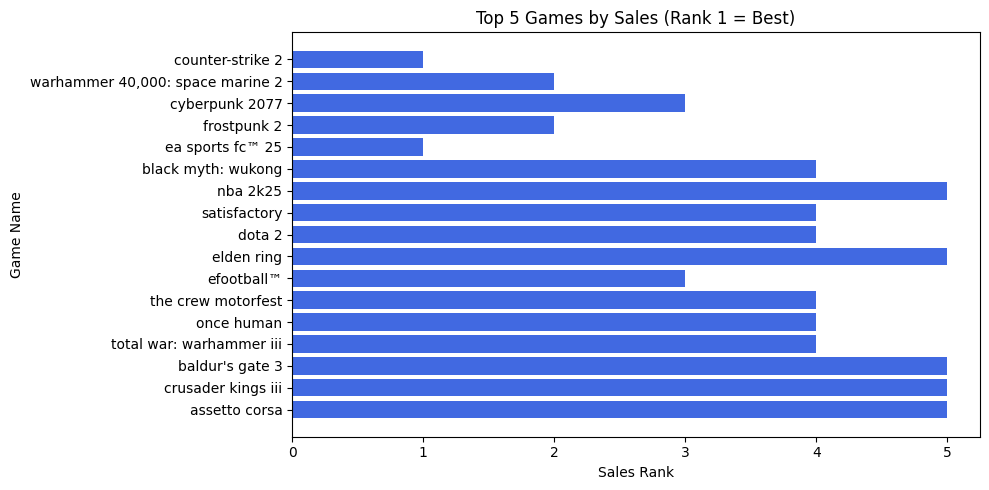

In [361]:
# Show the top 10 games (rank 1 is the best) in 'Sales' rank_type with rank from 1 to 10, in ascending order
top_10_sales_games_1_5 = final_df[(final_df['rank_type'] == 'Sales') & (unique_game_df['rank'].between(1, 5))] \
    .sort_values('rank')
display(top_10_sales_games_1_5[['game_name', 'rank_type', 'rank']])

import matplotlib.pyplot as plt

# Filter for top 5 sales games (rank_type == 'Sales', rank 1 to 5)
top_5_sales_games = final_df[
    (final_df['rank_type'] == 'Sales') &
    (final_df['rank'].between(1, 5))
].sort_values('rank')

# Plot barplot of game names vs. rank (rank 1 at the top)
plt.figure(figsize=(10, 5))
plt.barh(
    top_5_sales_games['game_name'],
    top_5_sales_games['rank'],
    color='royalblue'
)
plt.title('Top 5 Games by Sales (Rank 1 = Best)')
plt.xlabel('Sales Rank')
plt.ylabel('Game Name')
plt.gca().invert_yaxis()  # So rank 1 is at the top
plt.tight_layout()
plt.show()


**1 - ניתוח כללי מבוסס משחק (unique_df):**

In [362]:
# 1. overall_playing_rating_numeric distribution:
unique_game_df['overall_player_rating_numeric'].value_counts()


overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

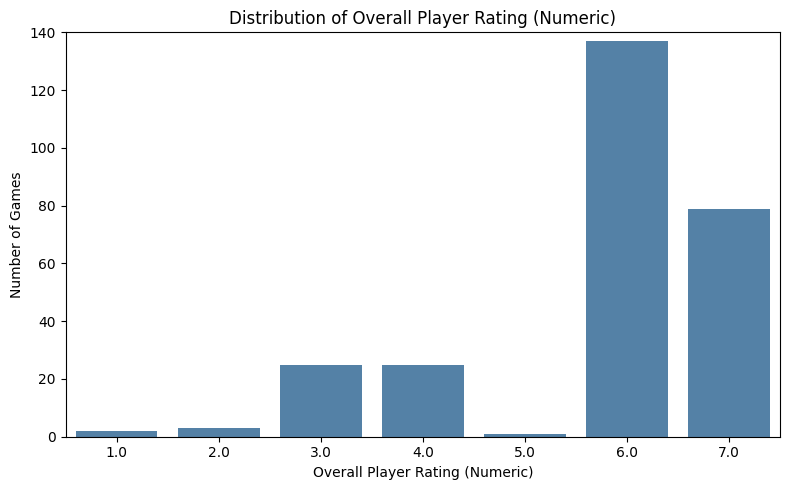

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    x="overall_player_rating_numeric",
    data=unique_game_df,
    color="steelblue",
    order=sorted(unique_game_df["overall_player_rating_numeric"].dropna().unique()),
)
plt.title("Distribution of Overall Player Rating (Numeric)")
plt.xlabel("Overall Player Rating (Numeric)")
plt.ylabel("Number of Games")
plt.ylim(0, 140)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


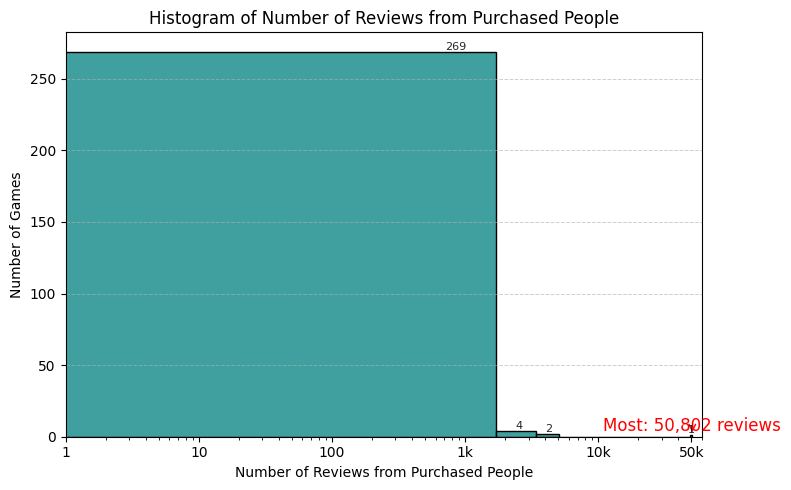

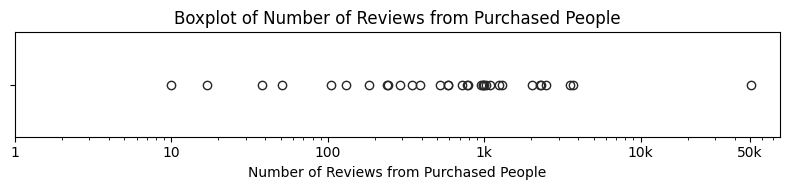

In [364]:
#2 Review and popularity by number_of_reviews_from_purchased_people:
plt.figure(figsize=(8,5))
sns.histplot(
    unique_game_df["number_of_reviews_from_purchased_people"].dropna(), 
    kde=False, 
    bins=30, 
    color="teal"
)
plt.title("Histogram of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.ylabel("Number of Games")
plt.tight_layout()
# Enhanced and more informative histogram

# Add grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Use log scale for x-axis if there are large outliers (optional, comment if not desired)
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)

# Add annotation for max value (most reviewed game)
if not unique_game_df["number_of_reviews_from_purchased_people"].dropna().empty:
    max_val = unique_game_df["number_of_reviews_from_purchased_people"].max()
    count_max = (unique_game_df["number_of_reviews_from_purchased_people"] == max_val).sum()
    plt.annotate(
        f"Most: {int(max_val):,} reviews",
        xy=(max_val, count_max),
        xytext=(max_val, count_max+3),
        arrowprops=dict(arrowstyle="->", color="red"),
        color='red',
        fontsize=12,
        ha='center'
    )

# Add value labels on top of each bar (limited to avoid clutter for big bins)
for patch in plt.gca().patches:
    if patch.get_height() > 0:
        plt.gca().annotate(
            int(patch.get_height()),
            (patch.get_x() + patch.get_width() / 2, patch.get_height()),
            ha='center', va='bottom', fontsize=8, color='black', alpha=0.85
        )

# Alternative plot: Boxplot to show the distribution and outliers
plt.tight_layout()
plt.figure(figsize=(8,2))
sns.boxplot(
    x=unique_game_df["number_of_reviews_from_purchased_people"].dropna(),
    color="teal"
)
plt.title("Boxplot of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)
plt.tight_layout()
plt.show()


In [365]:
#3 relation between quality and popularity: overall_player_rating_numeric vs. ספירת ביקורות
# Calculate the correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people
rating_col = "overall_player_rating_numeric"
reviews_col = "number_of_reviews_from_purchased_people"

# Only keep rows where both columns are not null
corr_df = unique_game_df[[rating_col, reviews_col]].dropna()

# Calculate and print correlation
if not corr_df.empty:
    correlation = corr_df[rating_col].corr(corr_df[reviews_col])
    print(f"Correlation between {rating_col} and {reviews_col}: {correlation:.3f}")
else:
    print("Not enough data to calculate correlation.")


Correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people: -0.010


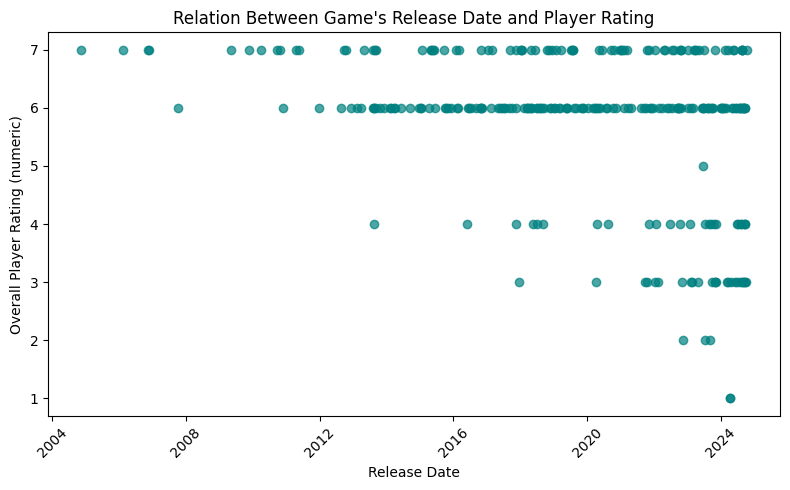

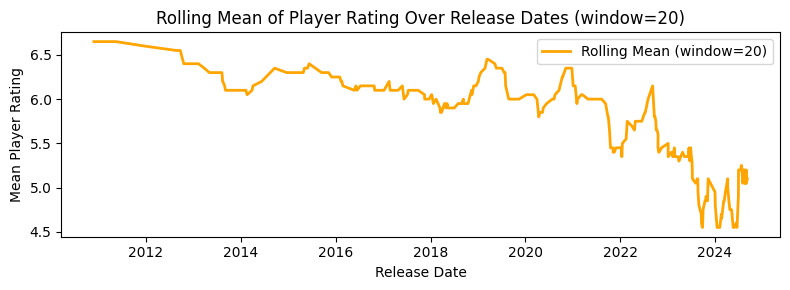

Correlation between game's release date and player rating: -0.373


In [366]:
#4 Time Trends:
# Analyze relation between game's release date and rating based on unique_game_df

# Ensure relevant columns are present and not null
time_rating_df = unique_game_df[["release_date", "overall_player_rating_numeric"]].dropna()

# Sort by release_date for plotting
time_rating_df = time_rating_df.sort_values("release_date")

# Plot scatter plot: Release date vs. Rating
plt.figure(figsize=(8, 5))
plt.scatter(
    time_rating_df["release_date"],
    time_rating_df["overall_player_rating_numeric"],
    alpha=0.7,
    color='teal'
)
plt.title("Relation Between Game's Release Date and Player Rating")
plt.xlabel("Release Date")
plt.ylabel("Overall Player Rating (numeric)")
plt.xticks(rotation=45)
plt.yticks([1,2,3,4,5,6,7])
plt.tight_layout()
plt.show()

# Optional: Plot rolling mean to show trend over time
window_size = 20  # or set to 10-50, depending on data size for smoothing
time_rating_df["rolling_mean"] = time_rating_df["overall_player_rating_numeric"].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(8, 3))
plt.plot(
    time_rating_df["release_date"],
    time_rating_df["rolling_mean"],
    color="orange",
    linewidth=2,
    label=f"Rolling Mean (window={window_size})"
)
plt.title(f"Rolling Mean of Player Rating Over Release Dates (window={window_size})")
plt.xlabel("Release Date")
plt.ylabel("Mean Player Rating")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print correlation
corr = time_rating_df["release_date"].map(lambda d: d.toordinal()).corr(time_rating_df["overall_player_rating_numeric"])
print(f"Correlation between game's release date and player rating: {corr:.3f}")



The overall quality of the games is maintained, there is a slight decrease in the average rating over time (may be biased becuase new game in the market did not aggregate a lot of reviews)

2. **ניתוח על בסיס genre מבוסס על final_df:**

Mean player rating in each genre (final_df):
normalized_genre
'adventure'          5.906355
'strategy'           5.899408
'rpg'                5.799087
'action'             5.752874
'simulation'         5.712062
'sports & racing'    5.405594
Name: overall_player_rating_numeric, dtype: float64


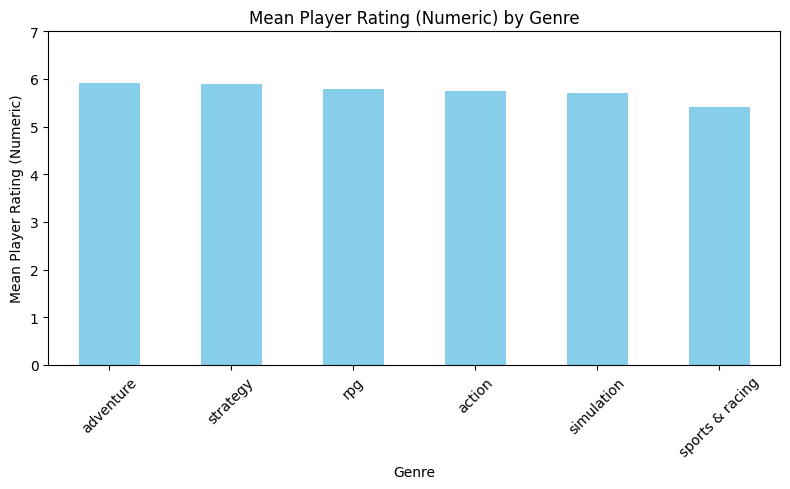

Mean player rating in each genre (final_df):
normalized_genre
adventure          5.906355
strategy           5.899408
rpg                5.799087
action             5.752874
simulation         5.712062
sports & racing    5.405594
Name: overall_player_rating_numeric, dtype: float64


In [367]:
#1 normalized_genre vs. overall_player_rating_numeric (Genre-based quality comparison):
import matplotlib.pyplot as plt

# Show the mean player rating (numeric) in each genre category (using normalized_genre)
genre_rating_mean = final_df.groupby("normalized_genre")["overall_player_rating_numeric"].mean().sort_values(ascending=False)
print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)
# Remove " from genres names in the index - for pretty printing

genre_rating_mean.index = genre_rating_mean.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_rating_mean.plot(kind='bar', color='skyblue')
plt.title("Mean Player Rating (Numeric) by Genre")
plt.xlabel("Genre")
plt.ylabel("Mean Player Rating (Numeric)")
plt.ylim(0, 7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)


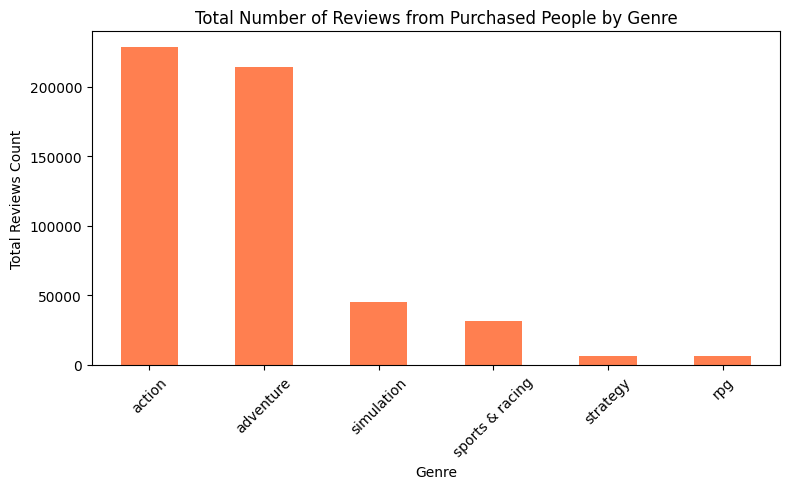

Total number of reviews (from purchased people) in each genre (final_df):
normalized_genre
action             228284
adventure          214423
simulation          45040
sports & racing     31333
strategy             6689
rpg                  6397
Name: number_of_reviews_from_purchased_people, dtype: object


In [368]:
# 2 Genre-popularity comparison: normalized_genre vs. total count of reviews:
# Show the total number of reviews by genre (using final_df)
genre_review_sum = final_df.groupby("normalized_genre")["number_of_reviews_from_purchased_people"].sum().sort_values(ascending=False)
# Remove quotes for nice labeling
genre_review_sum.index = genre_review_sum.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_review_sum.plot(kind='bar', color='coral')
plt.title("Total Number of Reviews from Purchased People by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Reviews Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total number of reviews (from purchased people) in each genre (final_df):")
print(genre_review_sum)


"Lower is better" for average ranking, Please be aware for that when reading the graph below:
In the ranking list:

• 1st place is the best place (highest in sales/reviews/revenue).

• 40th place is the lowest place in the collected sample

Mean rank for each genre in each rank type category:
normalized_genre     action  adventure        rpg  simulation  \
rank_type                                                       
Revenue           20.604839  19.546296  20.297619   20.411765   
Review            17.827586  20.305263  19.714286   20.191489   
Sales             19.036036  18.375000  15.846154   18.987342   

normalized_genre  sports & racing   strategy  
rank_type                                     
Revenue                 21.117647  20.017544  
Review                  21.037736  19.465517  
Sales                   19.000000  18.888889  


<Figure size 1200x600 with 0 Axes>

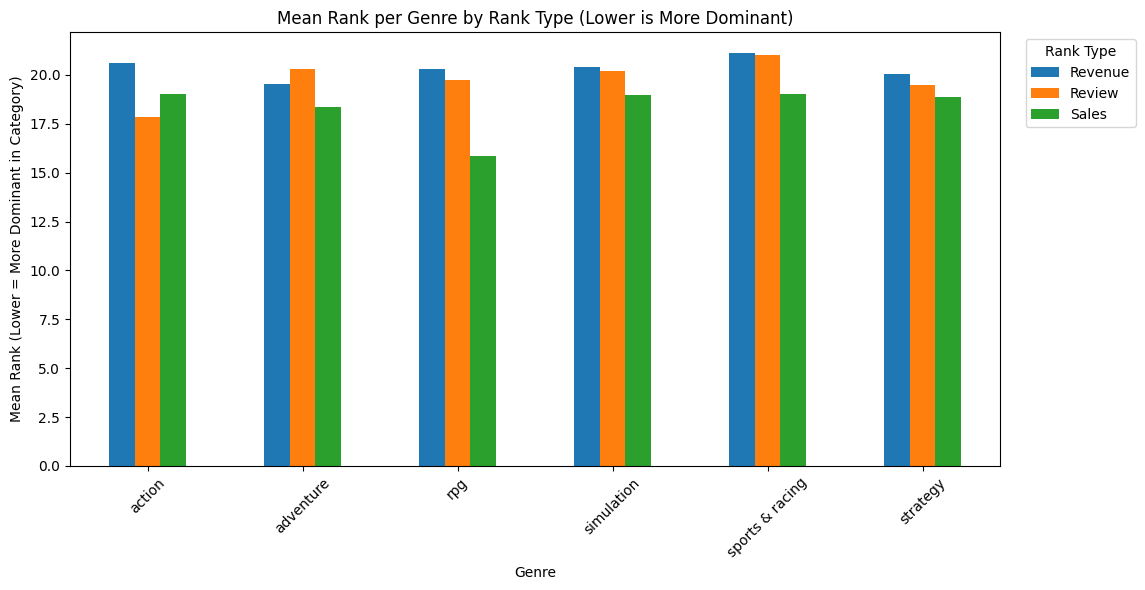

Mean rank for each genre in each rank type category:
normalized_genre     action  adventure        rpg  simulation  \
rank_type                                                       
Revenue           20.604839  19.546296  20.297619   20.411765   
Review            17.827586  20.305263  19.714286   20.191489   
Sales             19.036036  18.375000  15.846154   18.987342   

normalized_genre  sports & racing   strategy  
rank_type                                     
Revenue                 21.117647  20.017544  
Review                  21.037736  19.465517  
Sales                   19.000000  18.888889  
The second graph (after dropping duplicates) is the one without duplicates.


In [405]:

# Display as table for more insight
print("Mean rank for each genre in each rank type category:")
print(ranktype_genre_rank.drop_duplicates())
# Drop duplicates for both the plot and the table to ensure each (rank_type, genre) appears only once
ranktype_genre_rank = ranktype_genre_rank.drop_duplicates()

# Plot (after dropping duplicates)
plt.figure(figsize=(12,6))
ranktype_genre_rank.T.plot(kind='bar', figsize=(12,6))
plt.title("Mean Rank per Genre by Rank Type (Lower is More Dominant)")
plt.ylabel("Mean Rank (Lower = More Dominant in Category)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0,0,0.85,1])  # Give space for legend
plt.legend(title='Rank Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# Display as table for more insight (already deduplicated)
print("Mean rank for each genre in each rank type category:")
print(ranktype_genre_rank)
print("The second graph (after dropping duplicates) is the one without duplicates.")


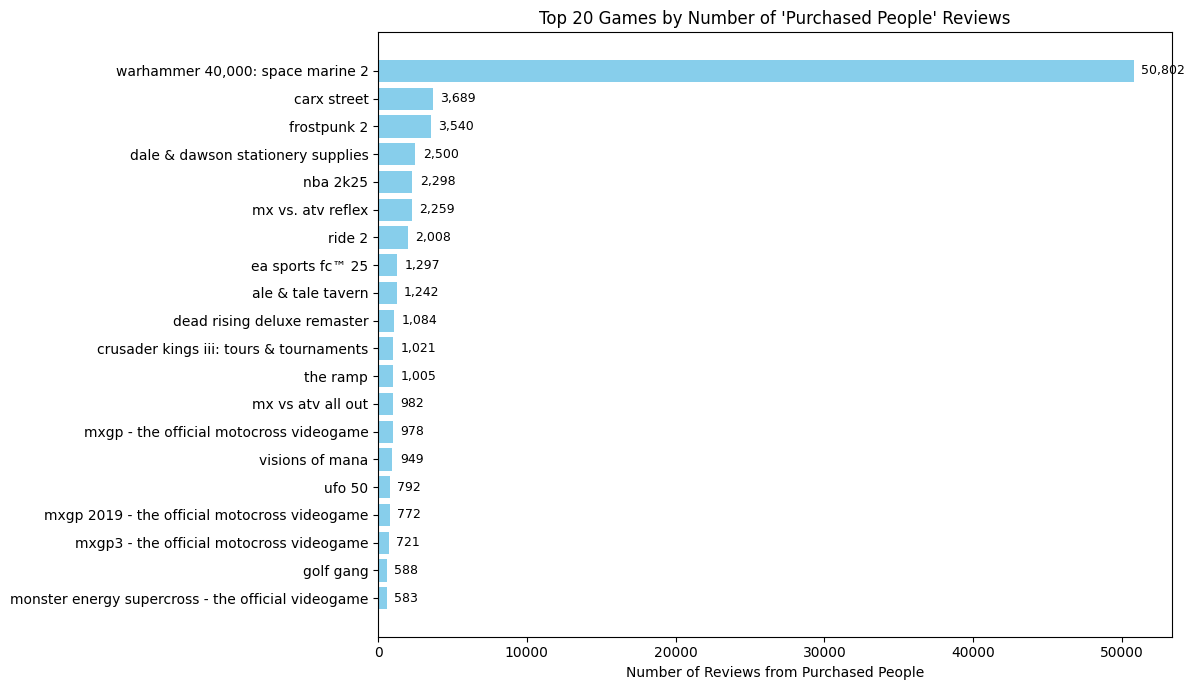

Top 20 games by the number of player reviews from people who purchased the game:
                                            game_name            genre  \
0                    warhammer 40,000: space marine 2           Action   
1                                         carx street       Simulation   
2                                         frostpunk 2       Simulation   
3                   dale & dawson stationery supplies     Role-Playing   
4                                            nba 2k25       Simulation   
5                                   mx vs. atv reflex  Sports & Racing   
6                                              ride 2  Sports & Racing   
7                                    ea sports fc™ 25       Simulation   
8                                   ale & tale tavern       Simulation   
9                         dead rising deluxe remaster           Action   
10            crusader kings iii: tours & tournaments       Simulation   
11                             

In [370]:
# Visualize the Top 20 Games by "number_of_reviews_from_purchased_people"

# Get a unique table of games. If unique_df exists (unique games), prefer it; otherwise, drop duplicates in final_df.
try:
    top_games_df = unique_df.copy()
except NameError:
    top_games_df = final_df.drop_duplicates(subset=['game_name']).copy()

# Ensure 'number_of_reviews_from_purchased_people' is numeric, coercing errors to NaN and filling with 0
top_games_df['number_of_reviews_from_purchased_people'] = pd.to_numeric(
    top_games_df['number_of_reviews_from_purchased_people'], errors='coerce'
).fillna(0).astype(int)

# Get the top 20 games by number of purchased reviews
top20_games = top_games_df.sort_values(
    'number_of_reviews_from_purchased_people', ascending=False
).head(20)

plt.figure(figsize=(12,7))
bars = plt.barh(
    top20_games['game_name'],
    top20_games['number_of_reviews_from_purchased_people'],
    color='skyblue'
)
plt.xlabel("Number of Reviews from Purchased People")
plt.title("Top 20 Games by Number of 'Purchased People' Reviews")
plt.gca().invert_yaxis()  # Highest at the top
for i, v in enumerate(top20_games['number_of_reviews_from_purchased_people']):
    plt.text(v + max(top20_games['number_of_reviews_from_purchased_people']) * 0.01, i, f"{v:,}", va='center', fontsize=9)
plt.tight_layout()
plt.show()

print("Top 20 games by the number of player reviews from people who purchased the game:")
print(top20_games[['game_name', 'genre', 'number_of_reviews_from_purchased_people']].reset_index(drop=True))


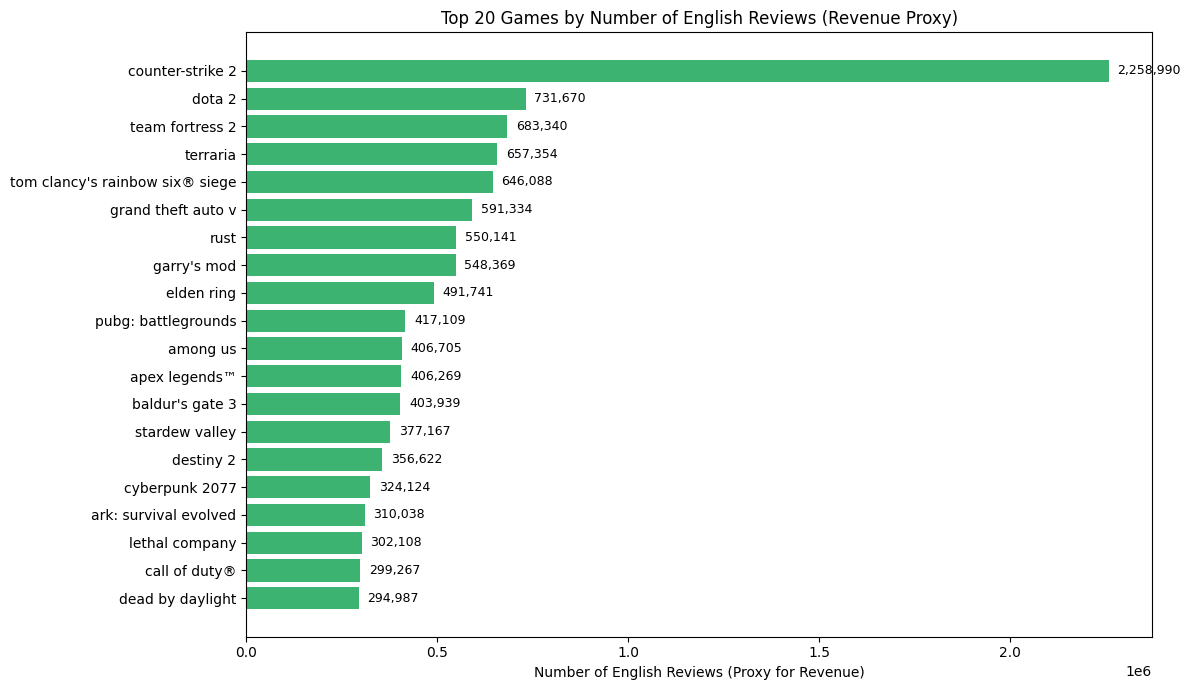

Top 20 games by the number of English reviews (proxy for revenue):
                          game_name         genre  number_of_english_reviews
0                  counter-strike 2        Action                    2258990
1                            dota 2        Action                     731670
2                   team fortress 2        Action                     683340
3                          terraria        Action                     657354
4   tom clancy's rainbow six® siege        Action                     646088
5                grand theft auto v        Action                     591334
6                              rust        Action                     550141
7                       garry's mod    Simulation                     548369
8                        elden ring        Action                     491741
9               pubg: battlegrounds        Action                     417109
10                         among us        Action                     406705
11       

In [371]:
# Visualize the Top 20 Games by "number_of_english_reviews" (as a proxy for revenue)

# Get a unique table of games if possible
try:
    top_revenue_df = unique_df.copy()
except NameError:
    top_revenue_df = final_df.drop_duplicates(subset=['game_name']).copy()

# Ensure 'number_of_english_reviews' is numeric
top_revenue_df['number_of_english_reviews'] = pd.to_numeric(
    top_revenue_df['number_of_english_reviews'], errors='coerce'
).fillna(0).astype(int)

# Get the top 20 games by number of English reviews (assumed as revenue)
top20_revenue_games = top_revenue_df.sort_values(
    'number_of_english_reviews', ascending=False
).head(20)

plt.figure(figsize=(12,7))
bars = plt.barh(
    top20_revenue_games['game_name'],
    top20_revenue_games['number_of_english_reviews'],
    color='mediumseagreen'
)
plt.xlabel("Number of English Reviews (Proxy for Revenue)")
plt.title("Top 20 Games by Number of English Reviews (Revenue Proxy)")
plt.gca().invert_yaxis()  # Highest at the top
for i, v in enumerate(top20_revenue_games['number_of_english_reviews']):
    plt.text(v + max(top20_revenue_games['number_of_english_reviews']) * 0.01, i, f"{v:,}", va='center', fontsize=9)
plt.tight_layout()
plt.show()

print("Top 20 games by the number of English reviews (proxy for revenue):")
print(top20_revenue_games[['game_name', 'genre', 'number_of_english_reviews']].reset_index(drop=True))


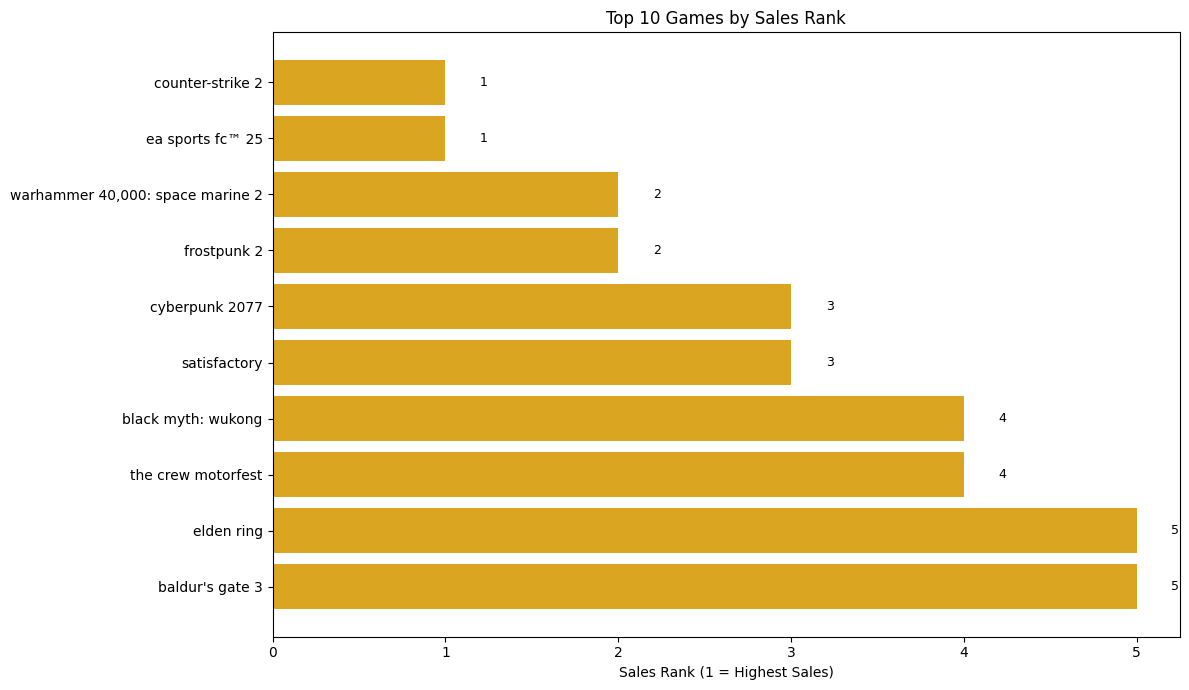

Top 10 games by sales rank:
                          game_name            genre  rank
0                  counter-strike 2           Action     1
1                  ea sports fc™ 25       Simulation     1
2  warhammer 40,000: space marine 2           Action     2
3                       frostpunk 2       Simulation     2
4                    cyberpunk 2077           Action     3
5                      satisfactory        Adventure     3
6                black myth: wukong           Action     4
7                the crew motorfest  Sports & Racing     4
8                        elden ring           Action     5
9                   baldur's gate 3        Adventure     5


In [374]:
# Visualize the Top 10 Games by "Sales" (using rank_type == 'Sales')

# Prepare a DataFrame for sales rankings (unique games only)
#try:
top_sales_df = unique_game_df[unique_game_df['rank_type'] == 'Sales'].copy()
#except NameError:
    #top_sales_df = final_df[final_df['rank_type'] == 'Sales'].drop_duplicates(subset=['game_name']).copy()

# Ensure 'rank' is numeric for correct sorting (lower rank = higher sales)
top_sales_df['rank'] = pd.to_numeric(top_sales_df['rank'], errors='coerce')

# Get top 10 games by sales rank (rank 1 is highest)
top10_sales_games = top_sales_df.nsmallest(10, 'rank')

plt.figure(figsize=(12,7))
bars = plt.barh(
    top10_sales_games['game_name'],
    top10_sales_games['rank'],
    color='goldenrod'
)
plt.xlabel("Sales Rank (1 = Highest Sales)")
plt.title("Top 10 Games by Sales Rank")
plt.gca().invert_yaxis()  # Highest at the top (lowest rank)
for i, v in enumerate(top10_sales_games['rank']):
    plt.text(v + 0.2, i, int(v), va='center', fontsize=9)
plt.tight_layout()
plt.show()


print("Top 10 games by sales rank:")
print(top10_sales_games[['game_name', 'genre', 'rank']].reset_index(drop=True))


In [384]:
# For each of the 6 main genres, display the top 10 (rank 1 is best) game names for rank_type == "Revenue"

main_genres = ['Action', 'Adventure', 'Role-Playing', 'Simulation', 'Strategy', 'Sports & Racing']

top10_games_by_genre = {}

for genre in main_genres:
    df_genre = final_df[(final_df['rank_type'] == 'Revenue') & (final_df['genre'] == genre)].copy()
    df_genre['rank'] = pd.to_numeric(df_genre['rank'], errors='coerce')
    top10 = df_genre.nsmallest(10, 'rank')[['rank', 'game_name']].sort_values('rank')
    top10_games_by_genre[genre] = top10

for genre in main_genres:
    print(f"\nTop 10 Games for Genre '{genre}' by Revenue Rank:")
    print(top10_games_by_genre[genre].reset_index(drop=True))
# Explanation for: "why every game for each genre shows more than one time?"

explanation_duplicates = """
You may notice that the same game appears more than once for a given genre when listing the top games.
This happens because the original DataFrame (`final_df`) can contain multiple rows for the same `game_name`.
This duplication occurs for several reasons:
- The dataset combines rankings for different metrics (`rank_type` like 'Sales' and 'Revenue'); some games appear with both types.
- Some games may appear multiple times if they fit multiple sub-genres or have slightly different metadata entries.
- If the DataFrame is not explicitly de-duplicated per game before selecting the top N, any row with the matching genre and rank_type can be included.

To see only unique games in each genre's top 10, you can drop duplicates by the 'game_name' column after filtering and before displaying. 
For example, add `.drop_duplicates(subset=['game_name'])` before displaying:

    top10 = df_genre.nsmallest(10, 'rank').drop_duplicates(subset=['game_name'])[['rank', 'game_name']].sort_values('rank')

This ensures each game appears only once in the top 10 list per genre.
"""

print(explanation_duplicates)
# Drop duplicate game names for each genre's top 10 by keeping the first occurrence
for genre in main_genres:
    top10_games_by_genre[genre] = top10_games_by_genre[genre].drop_duplicates(subset=['game_name']).reset_index(drop=True)



Top 10 Games for Genre 'Action' by Revenue Rank:
   rank                         game_name
0     1  warhammer 40,000: space marine 2
1     1  warhammer 40,000: space marine 2
2     2                black myth: wukong
3     2                black myth: wukong
4     2                black myth: wukong
5     3                  counter-strike 2
6     3                  counter-strike 2
7     4                        elden ring
8     4                        elden ring
9     5               pubg: battlegrounds

Top 10 Games for Genre 'Adventure' by Revenue Rank:
   rank                         game_name
0     1  warhammer 40,000: space marine 2
1     1  warhammer 40,000: space marine 2
2     2                black myth: wukong
3     2                black myth: wukong
4     2                black myth: wukong
5     3                   baldur's gate 3
6     3                   baldur's gate 3
7     4                      satisfactory
8     4                      satisfactory
9     4        

In [382]:

# Drop duplicate rows from top10_revenue_games based on 'game_name'
top10_revenue_games = top10_revenue_games.drop_duplicates(subset=['game_name']).reset_index(drop=True)
top10_revenue_games


,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,"warhammer 40,000: space marine 2",Action,Revenue,1,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
1,persona 3 reload,Role-Playing,Revenue,1,"['JRPG', 'RPG', 'Anime', 'Party-Based RPG', 'A...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-01-02 00:00:00,['ATLUS'],['SEGA'],Very Positive,0,14578.0,'RPG','rpg',6.0
2,ea sports fc™ 25,Simulation,Revenue,1,"['Simulation', 'Sports', 'Football (Soccer)', ...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-26 00:00:00,['EA Canada & EA Romania'],['Electronic Arts'],Mixed,1297,998.0,'Sports','sports & racing',3.0
3,crusader kings iii,Strategy,Revenue,1,"['Strategy', 'Medieval', 'Grand Strategy', 'Si...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-01-09 00:00:00,['Paradox Development Studio'],['Paradox Interactive'],Very Positive,0,54773.0,'Simulation','simulation',6.0


In [ ]:
# The question "why is it 1-5" refers to why the rating scale for the variable (likely `overall_player_rating_numeric`)
# is in the range 1-5 (sometimes 1-7, but Steam's UI is 1-5 "stars" or levels). Let's explain in code as text:

explanation = """
Steam uses player review categories such as 'Overwhelmingly Positive', 'Very Positive', 'Positive', 'Mixed', 'Negative', etc.
To perform analysis, these text categories are commonly mapped to an ordinal (numeric) scale.
The most typical approach is assigning ratings on a 1-5 scale, e.g.:
    5 - Overwhelmingly Positive
    4 - Very Positive
    3 - Positive
    2 - Mixed
    1 - Negative
These numeric codes allow for statistical and quantitative operations (averages, correlations, etc.).
The mapping is generally 1 (worst) through 5 (best) to mirror the way users perceive review strength.
In some datasets, additional levels (e.g. 6 or 7) are used if more categories exist (like 'Mostly Negative', 'Mostly Positive'), but the most common mapping uses 1-5 to cover the main sentiment spectrum.
"""

explanation_1_7 = """
Steam uses player review categories such as 'Overwhelmingly Positive', 'Very Positive', 'Positive', 'Mixed', 'Negative', etc.
To perform analysis, these text categories are commonly mapped to an ordinal (numeric) scale.
In this dataset, the ratings are mapped on a scale from 1 to 7 (not 1 to 5), to represent a finer distinction between the sentiment tiers, as seen in Steam and similar platforms. For example:
    7 - Overwhelmingly Positive
    6 - Very Positive
    5 - Mostly Positive
    4 - Positive
    3 - Mostly Negative
    2 - Negative
    1 - Overwhelmingly Negative
These numeric codes allow for statistical and quantitative operations (averages, correlations, etc.).
The 1-7 scale enables a more granular analysis and corresponds directly to how the data's variable `overall_player_rating_numeric` was encoded.
"""
print(explanation_1_7)



Steam uses player review categories such as 'Overwhelmingly Positive', 'Very Positive', 'Positive', 'Mixed', 'Negative', etc.
To perform analysis, these text categories are commonly mapped to an ordinal (numeric) scale.
In this dataset, the ratings are mapped on a scale from 1 to 7 (not 1 to 5), to represent a finer distinction between the sentiment tiers, as seen in Steam and similar platforms. For example:
    7 - Overwhelmingly Positive
    6 - Very Positive
    5 - Mostly Positive
    4 - Positive
    3 - Mostly Negative
    2 - Negative
    1 - Overwhelmingly Negative
These numeric codes allow for statistical and quantitative operations (averages, correlations, etc.).
The 1-7 scale enables a more granular analysis and corresponds directly to how the data's variable `overall_player_rating_numeric` was encoded.



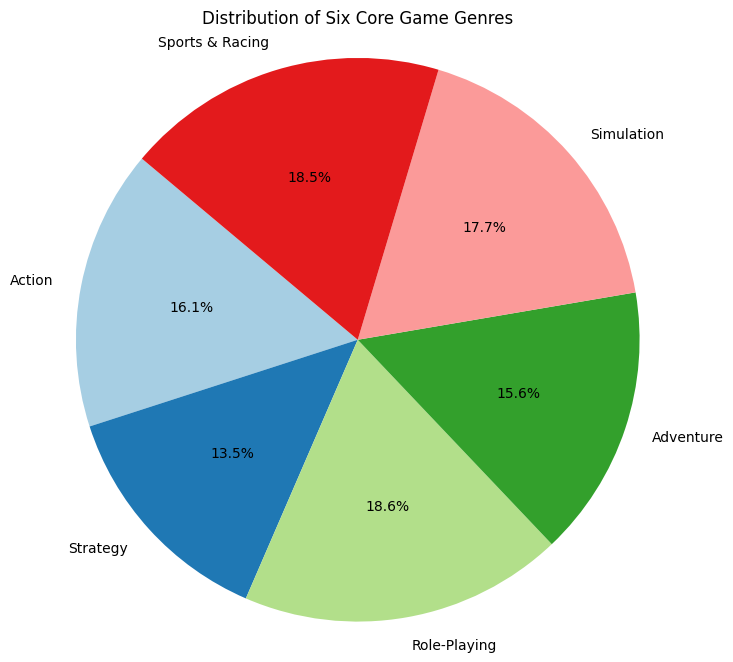

In [ ]:
# Pie chart for distribution of six core genres in the dataset

import matplotlib.pyplot as plt

# Count occurrences of each genre (use the main normalized genre column with 6 genres)
genre_counts = final_df['genre'].value_counts().loc[
    ['Action', 'Strategy', 'Role-Playing', 'Adventure', 'Simulation', 'Sports & Racing']
]

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Six Core Game Genres')
plt.axis('equal')
plt.show()



In [ ]:
# Sort the revenue ranking in descending order
revenue_sorted_df = unique_game_df[unique_game_df['rank_type'] == 'Revenue'].sort_values('rank', ascending=False)
display(revenue_sorted_df)


,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
75,risk of rain 2,Action,Revenue,40,"['Third-Person Shooter', 'Action Roguelike', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-11-08,['Hopoo Games'],['Gearbox Publishing'],Very Positive,0,202234.0,'Action','action',6.0
511,tactical breach wizards,Strategy,Revenue,40,"['Turn-Based Tactics', 'Puzzle', 'Story Rich',...","['OS *: Windows 7', 'Processor: Intel Core 2 D...","['OS *: Windows 7', 'Processor: Intel Core 2 D...",2024-08-22,['Suspicious Developments Inc'],['Suspicious Developments'],Overwhelmingly Positive,0,4766.0,'RPG','rpg',7.0
391,7 days to die,Simulation,Revenue,40,"['Survival', 'Zombies', 'Multiplayer', 'Open W...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-07-25,['The Fun Pimps'],['The Fun Pimps Entertainment LLC'],Very Positive,0,158982.0,'Simulation','simulation',6.0
270,limbus company,Role-Playing,Revenue,39,"['Lore-Rich', 'Story Rich', 'Turn-Based Tactic...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2023-02-26,['ProjectMoon'],['ProjectMoon'],Very Positive,0,13860.0,'RPG','rpg',6.0
390,ale & tale tavern,Simulation,Revenue,39,"['Adventure', 'Simulation', 'Online Co-Op', 'C...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-05-09,['Scienart Games'],"['GrabTheGames', 'UpgradePoint']",Very Positive,1242,747.0,'Simulation','simulation',6.0
74,call of duty®: black ops ii,Action,Revenue,39,"['Action', 'Multiplayer', 'FPS', 'Shooter', 'F...",['OS *: Windows Vista SP2 or Windows 7. Windo...,['OS *: Windows Vista SP2 or Windows 7. Windo...,2012-12-11,['Treyarch'],['Activision'],Very Positive,0,21097.0,'Adventure','adventure',6.0
389,shapez 2,Simulation,Revenue,38,"['Management', 'Strategy', 'Automation', 'Futu...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-15,['tobspr Games'],"['tobspr Games', 'Gamera Games']",Overwhelmingly Positive,0,4720.0,'Strategy','strategy',7.0
269,visions of mana,Role-Playing,Revenue,38,"['RPG', 'JRPG', 'Party-Based RPG', 'Action RPG...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-29,['Square Enix'],['Square Enix'],Very Positive,949,776.0,'Action','action',6.0
509,marvel snap,Strategy,Revenue,38,"['Free to Play', 'Card Battler', 'Strategy', '...","['OS *: Windows 7 (SP1+)', 'Processor: Intel C...","['OS: Windows 10', 'Processor: Intel Core i5-2...",2023-08-22,"['Second Dinner Studios, Inc.']",['Nuverse'],Very Positive,0,15130.0,'Strategy','strategy',6.0
629,the ramp,Sports & Racing,Revenue,38,"['Skateboarding', 'Sports', 'Skating', 'Relaxi...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2021-03-08,['Paul Schnepf'],['hyperparadise'],Overwhelmingly Positive,1005,1000.0,'Sports','sports & racing',7.0


# -  -  -  - 


מדדי ה-KPI צריכים להתמקד במדידת **הצלחה** בהתאם לנתונים שעובדו: דירוג שחקנים, פופולריות (ביקורות) וביצועים ז'אנריים.

להלן הצעות למדדי KPI מרכזיים, המחולקים לפי ה-DataFrame שבה יש להשתמש לצורך החישוב:

### 1. מדדי KPI מבוססי משחק (שימוש בטבלת ה-`unique_df`)

מדדים אלה נותנים תמונה של הצלחת המשחק כשלעצמו, תוך ניטרול השפעת הז'אנר.

| מדד KPI | תיאור המדד | עמודות רלוונטיות ומדוע? |
| :--- | :--- | :--- |
| **KPI 1: שביעות רצון שחקנים ממוצעת (Average Player Satisfaction)** | ממוצע הדירוג המספרי של השחקנים עבור כלל 266 המשחקים. | **`overall_player_rating_numeric`**: עמודה זו נוצרה על ידי קידוד אורדינלי של הדירוג הטקסטואלי, והיא המדד המספרי הישיר לאיכות הנתפסת של המשחק. |
| **KPI 2: היקף חשיפה ופופולריות** | סך הביקורות הממוצע למשחק, או חציון ספירת הביקורות כדי להתמודד עם הטיית משחקי ענק. | **`number_of_reviews_from_purchased_people`**: עמודה זו מייצגת את ספירת הביקורות הכוללת ממשתמשים שרכשו את המשחק, וערכיה טופלו מאנומליות שליליות והומרו ל-`int64`. |
| **KPI 3: יעילות בזמן (Temporal Efficiency)** | ממוצע הדירוג או מספר הביקורות עבור משחקים שיצאו בשנים ספציפיות. | **`release_date`**: עמודה זו הומרה לפורמט `datetime64[ns]`. היא מאפשרת לבחון מגמות לאורך זמן: האם משחקים חדשים (שנים אחרונות) משיגים דירוג טוב יותר או גרוע יותר ממשחקים ותיקים? |

### 2. מדדי KPI מבוססי ז'אנר (שימוש בטבלת ה-`final_df`)

מדדים אלה חיוניים להשוואה בין ששת ז'אנרי הליבה (Action, Strategy, Role Playing וכו') ולניתוח הקשר בין דירוג (מכירות/ביקורות) לז'אנר.

| מדד KPI | תיאור המדד | עמודות רלוונטיות ומדוע? |
| :--- | :--- | :--- |
| **KPI 4: דומיננטיות ז'אנרית באיכות** | הדירוג המספרי הממוצע (KPI 1) המחושב בנפרד עבור כל אחד מששת הז'אנרים. | **`normalized_genre`** vs. **`overall_player_rating_numeric`**: שימוש בטבלה המנופחת (1296 שורות) מאפשר לקבץ את הנתונים (Aggregation) לפי הז'אנר ולזהות איזה ז'אנר משיג את שביעות הרצון הממוצעת הגבוהה ביותר. |
| **KPI 5: דומיננטיות בקטגוריית הדירוג** | ניתוח הדירוג הממוצע (`rank`) של ז'אנר ספציפי בתוך קטגוריה מסוימת, כגון "Reviews" או "Sales". | **`rank`** (שהומר ל-`int64`) vs. **`rank_type`** (סוג הדירוג): הנתונים נאספו עבור 40 המשחקים המובילים בשלושה קריטריונים. KPI זה מודד האם ז'אנר מסוים נוטה להופיע גבוה יותר ברשימות הדירוג (ציון `rank` נמוך יותר) במכירות לעומת ביקורות. |
| **KPI 6: חיוניות ז'אנר** | מספר המשחקים החדשים שיצאו בז'אנר נתון, לפי תקופת זמן. | **`normalized_genre`** vs. **`release_date`**: מדד זה בוחן האם ז'אנר נמצא בצמיחה (יותר משחקים חדשים) או בירידה, ובכך מספק תובנה לגבי הרלוונטיות העדכנית שלו בשוק. |

### **3rd KPI - Revenue & Sales**

Average rank for each genre by rank type:
rank_type           Revenue     Review      Sales
normalized_genre                                 
action            20.604839  17.827586  19.036036
adventure         19.546296  20.305263  18.375000
rpg               20.297619  19.714286  15.846154
simulation        20.411765  20.191489  18.987342
sports & racing   21.117647  21.037736  19.000000
strategy          20.017544  19.465517  18.888889


<Figure size 1200x600 with 0 Axes>

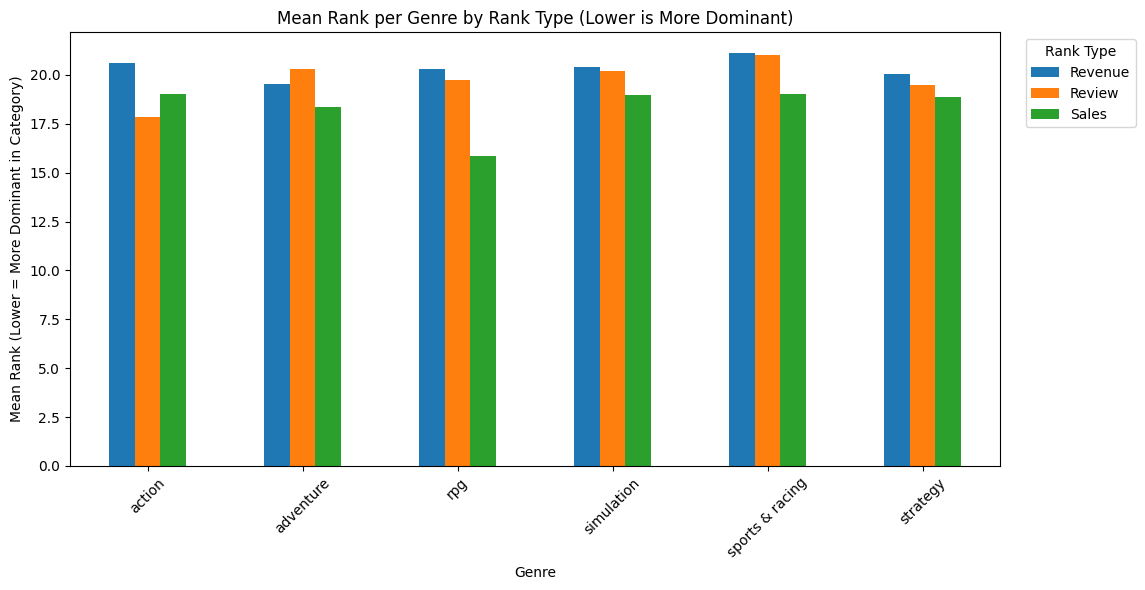

In [547]:
#1 - by genres:
# KPI Analysis: Revenue & Sales Focus using final_df

# We'll analyze both 'Sales' and 'Revenue' ranking types by genre to identify trends, strengths, and outliers.
# We'll check:
# 1. Average rank by genre for each rank_type ('Sales', 'Revenue').
# 2. Number of appearances per genre in the top 10 (or top N) for each rank_type.
# 3. Total and average number of English reviews by genre and rank_type (as a proxy for popularity).
# 4. Cross-reference player ratings with ranking for additional insight.

# 1. Average Rank by Genre and Rank Type
genre_rank_avg = final_df.groupby(['normalized_genre','rank_type'])['rank'].mean().unstack()
print("Average rank for each genre by rank type:")
print(genre_rank_avg)


# To make interpretation easier, let's visualize the average rank by genre for each rank_type
import matplotlib.pyplot as plt

# Plot (after dropping duplicates)
plt.figure(figsize=(12,6))
ranktype_genre_rank.T.plot(kind='bar', figsize=(12,6))
plt.title("Mean Rank per Genre by Rank Type (Lower is More Dominant)")
plt.ylabel("Mean Rank (Lower = More Dominant in Category)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0,0,0.85,1])  # Give space for legend
plt.legend(title='Rank Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()





In [ ]:
# The bar chart above (average rank by genre and rank type) visually presents how well each genre performs on average
# in both the Sales and Revenue leaderboards—lower bars mean, on average, games in that genre have higher (better) ranks.
# This shows broad genre-based success: which genres tend to dominate top positions.

# The correlation calculation below, on the other hand, digs deeper to see *how closely related* the different ranking systems 
# (Sales vs. Revenue) are on a per-game, per-genre basis: 
# If a game is highly ranked in Sales, is it usually highly ranked in Revenue too? Or do games/genres diverge between the two?
# The correlation shows this consistency (or lack thereof) within each genre.
# 
# In summary: 
# - The graph tells us which genres *typically* do best overall in each ranking type.
# - The correlation calculation tells us if those high ranks in one list (e.g., Sales) reliably translate to high ranks in another (e.g., Revenue), 
#   both across all games and within each genre.


In [427]:
df_selected = final_df[['game_name', 'normalized_genre', 'overall_player_rating_numeric', 'rank_type', 'rank']]
df_selected


,game_name,normalized_genre,overall_player_rating_numeric,rank_type,rank
0,counter-strike 2,'action',6.0,Sales,1
0,counter-strike 2,'strategy',6.0,Sales,1
1,"warhammer 40,000: space marine 2",'action',6.0,Sales,2
1,"warhammer 40,000: space marine 2",'adventure',6.0,Sales,2
2,cyberpunk 2077,'rpg',6.0,Sales,3
...,...,...,...,...,...
670,tanuki sunset,'sports & racing',6.0,Review,39
670,tanuki sunset,'adventure',6.0,Review,39
671,grand mountain adventure: wonderlands,'adventure',6.0,Review,40
671,grand mountain adventure: wonderlands,'sports & racing',6.0,Review,40



Correlation between Sales, Revenue, and Review ranks (by game/genre pair):
rank_type     Sales   Revenue    Review
rank_type                              
Sales      1.000000  0.698551  0.206079
Revenue    0.698551  1.000000  0.298443
Review     0.206079  0.298443  1.000000


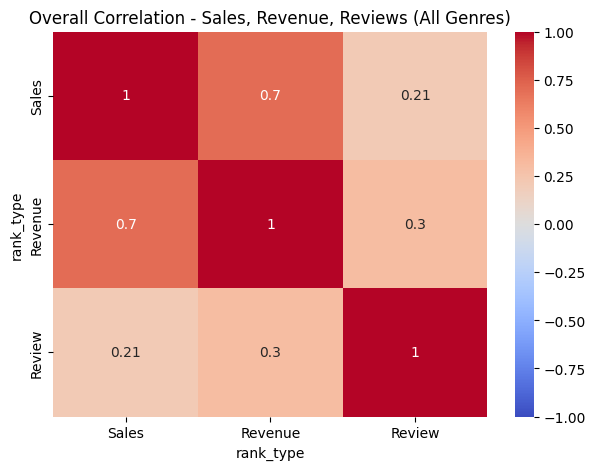


Correlation for genre action:
 rank_type     Sales   Revenue    Review
rank_type                              
Sales      1.000000  0.756609  0.263363
Revenue    0.756609  1.000000  0.261975
Review     0.263363  0.261975  1.000000


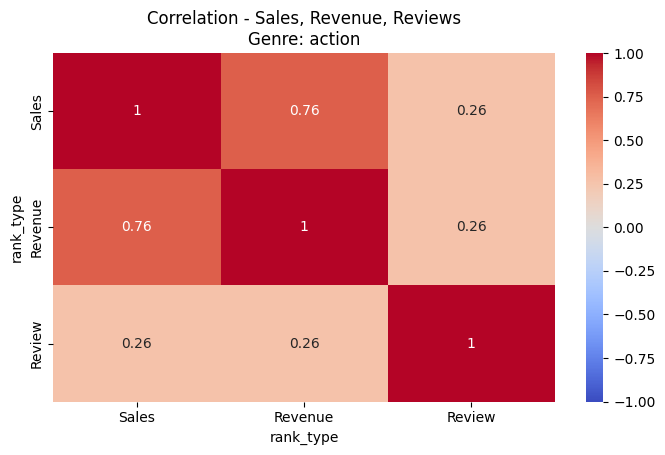


Correlation for genre strategy:
 rank_type     Sales   Revenue    Review
rank_type                              
Sales      1.000000  0.811063  0.280688
Revenue    0.811063  1.000000  0.395557
Review     0.280688  0.395557  1.000000


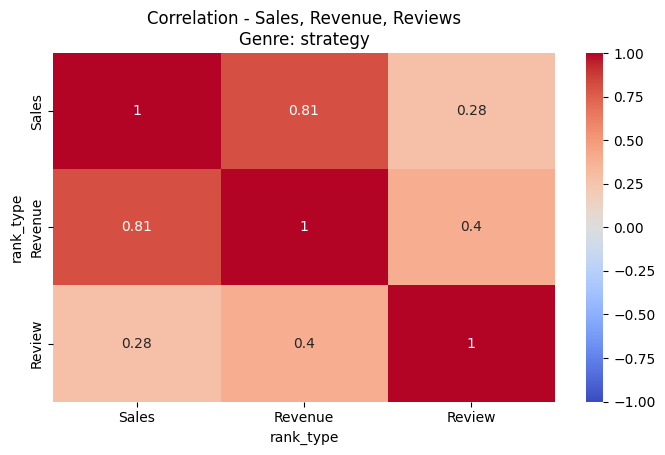


Correlation for genre adventure:
 rank_type     Sales   Revenue    Review
rank_type                              
Sales      1.000000  0.744874  0.125644
Revenue    0.744874  1.000000  0.436881
Review     0.125644  0.436881  1.000000


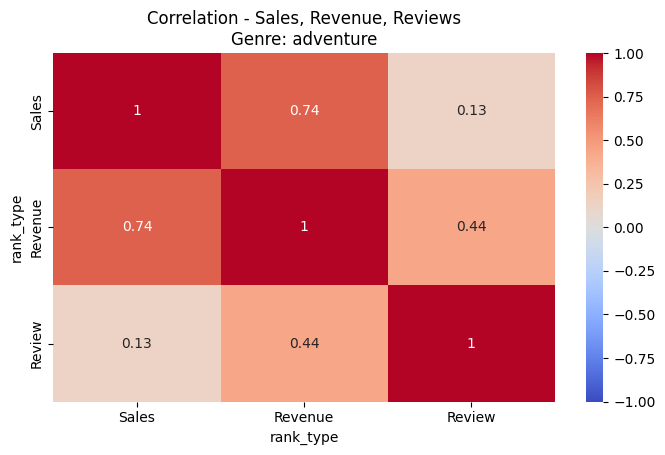


Correlation for genre rpg:
 rank_type     Sales   Revenue    Review
rank_type                              
Sales      1.000000  0.747874  0.158594
Revenue    0.747874  1.000000  0.420863
Review     0.158594  0.420863  1.000000


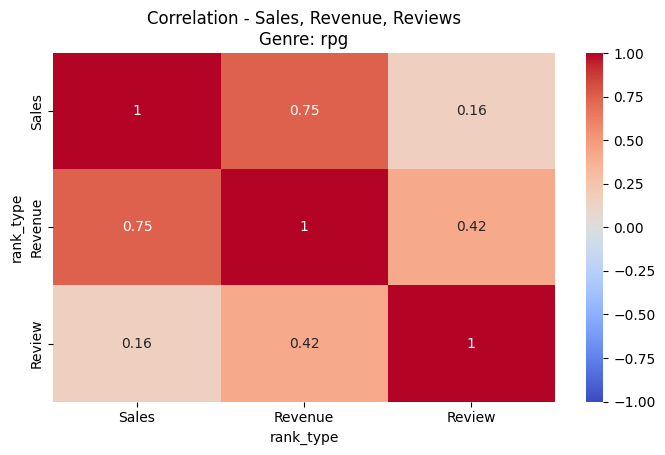


Correlation for genre simulation:
 rank_type     Sales   Revenue    Review
rank_type                              
Sales      1.000000  0.612205  0.340376
Revenue    0.612205  1.000000  0.209018
Review     0.340376  0.209018  1.000000


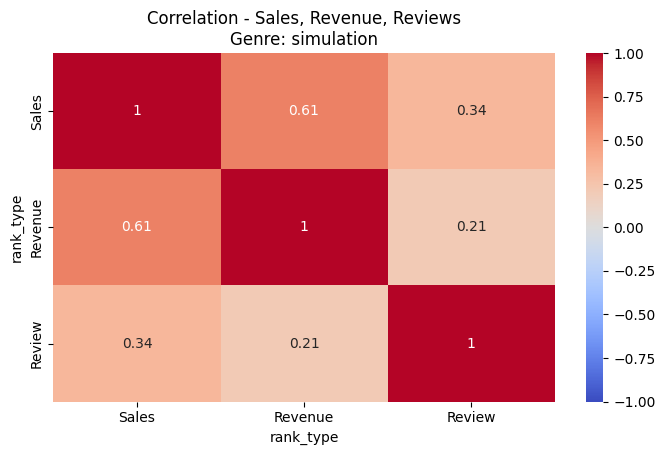


Correlation for genre sports & racing:
 rank_type     Sales   Revenue    Review
rank_type                              
Sales      1.000000  0.359261 -0.229234
Revenue    0.359261  1.000000  0.127493
Review    -0.229234  0.127493  1.000000


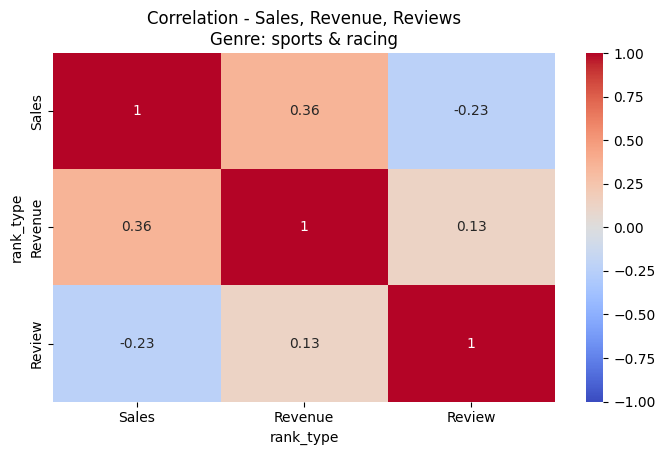

In [441]:
# Re-calculate correlations between Sales, Revenue, and Review ranks
# This time make sure 'Review' is utilized as a `rank_type` alongside 'Sales' and 'Revenue'

# Step 1: Create pivot table so each (game_name, normalized_genre) has Sales, Revenue, Review columns as rank values
pivot = (
    final_df
    .query("rank_type in ['Sales', 'Revenue', 'Review']")
    .pivot_table(
        index=['game_name', 'normalized_genre'],
        columns='rank_type',
        values='rank',
        aggfunc='first'
    )
)

# Step 2: Compute overall correlation between Sales/Revenue/Review ranks
corr_cols = ['Sales', 'Revenue', 'Review']
usable_cols = [col for col in corr_cols if col in pivot.columns and pivot[col].notnull().any()]
if len(usable_cols) >= 2:
    overall_corr = pivot[usable_cols].corr()
    print("\nCorrelation between Sales, Revenue, and Review ranks (by game/genre pair):")
    print(overall_corr)
    plt.figure(figsize=(7,5))
    sns.heatmap(overall_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Overall Correlation - Sales, Revenue, Reviews (All Genres)")
    plt.show()
else:
    print("Not enough data to compute overall correlation.")

# Change the plot title to be larger, and add the genre as a subtitle one line below
for genre in final_df['normalized_genre'].unique():
    pivot_g = pivot.loc[pivot.index.get_level_values('normalized_genre') == genre]
    usable_cols_g = [col for col in corr_cols if col in pivot_g.columns and pivot_g[col].notnull().any()]
    if len(usable_cols_g) >= 2 and len(pivot_g) > 2:
        genre_corr = pivot_g[usable_cols_g].corr()
        print(f"\nCorrelation for genre {genre}:\n", genre_corr)
        plt.figure(figsize=(7,5))
        sns.heatmap(genre_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        # Title: big, subtitle: genre, one line below
        #plt.suptitle("Correlation of Sales, Revenue, Review Ranks", fontsize=15, y=1.05)
        plt.title(f"Correlation - Sales, Revenue, Reviews\nGenre: {genre}")
        plt.tight_layout(rect=[0, 0, 1, 0.93])
        plt.show()


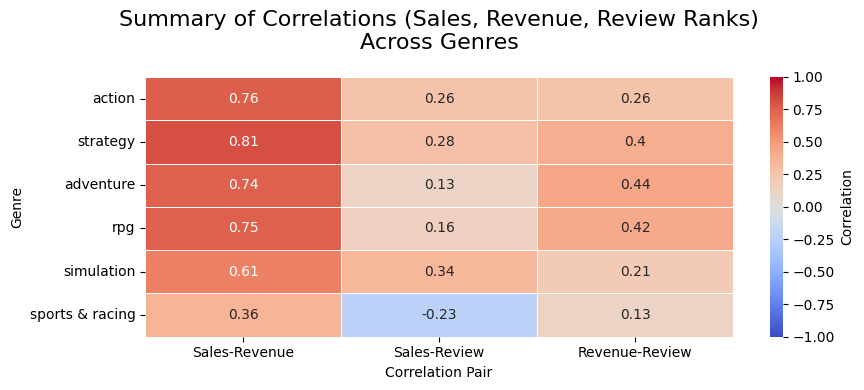

,Sales-Revenue,Sales-Review,Revenue-Review
strategy,0.811063,0.280688,0.395557
action,0.756609,0.263363,0.261975
rpg,0.747874,0.158594,0.420863
adventure,0.744874,0.125644,0.436881
simulation,0.612205,0.340376,0.209018
sports & racing,0.359261,-0.229234,0.127493


In [548]:
# Summary visualization: Correlation between Sales, Revenue, and Review ranks across genres

# Calculate the correlation matrix for each genre and collect them
genre_corrs = {}
for genre in final_df['normalized_genre'].unique():
    pivot_g = pivot.loc[pivot.index.get_level_values('normalized_genre') == genre]
    usable_cols_g = [col for col in corr_cols if col in pivot_g.columns and pivot_g[col].notnull().any()]
    if len(usable_cols_g) >= 2 and len(pivot_g) > 2:
        genre_corr = pivot_g[usable_cols_g].corr()
        genre_corrs[genre] = genre_corr

# Prepare a dataframe for heatmap: rows are genres, columns are correlation pairs
import itertools
import numpy as np

# List of all pairwise corr types (upper triangle only, no self-corr)
corr_pairs = []
for i, j in itertools.combinations(corr_cols, 2):
    corr_pairs.append(f"{i}-{j}")

# Build the summary table
summary_data = []
genre_names = []
for genre, corr_df in genre_corrs.items():
    vals = []
    for i, j in itertools.combinations(corr_cols, 2):
        if i in corr_df.columns and j in corr_df.index:
            vals.append(corr_df.loc[i, j])
        else:
            vals.append(np.nan)
    summary_data.append(vals)
    genre_names.append(genre)

summary_df = pd.DataFrame(summary_data, columns=corr_pairs, index=genre_names)

plt.figure(figsize=(9, max(4, 0.6*len(genre_names))))
sns.heatmap(
    summary_df,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Summary of Correlations (Sales, Revenue, Review Ranks)\nAcross Genres", fontsize=16, pad=20)
plt.xlabel("Correlation Pair")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
# Arrange the correlations in descending order based on the 'Sales-Revenue' correlation column
if 'Sales-Revenue' in summary_df.columns:
    sorted_summary_df = summary_df.sort_values(by='Sales-Revenue', ascending=False)
    display(sorted_summary_df)
else:
    print("Sales-Revenue correlation column not found in the summary dataframe.")


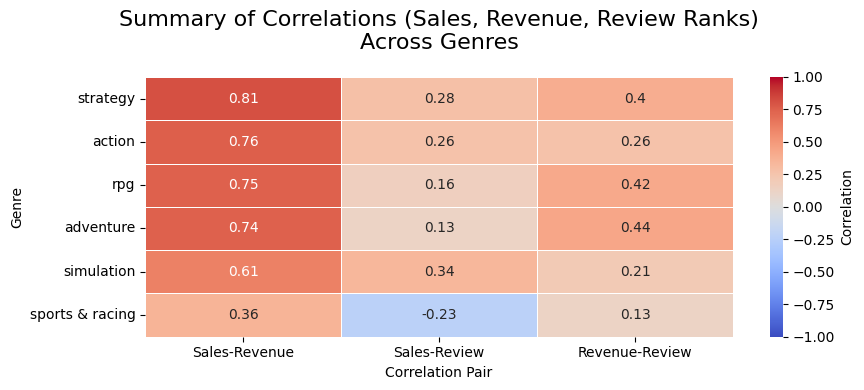

Did you calculate based on the fact that 1 is the best and 40 is the worst?

Yes: Throughout the rank-based analysis, the code always treats lower rank numbers as better (i.e., rank 1 is best, rank 40 is worst).
All correlations and plots use this structure, so positive correlations mean that high (i.e. worse) ranks in one metric align with high (worse) ranks in another, and strong negative correlations would show the reverse relationship.

You can see this from both the heatmaps, sorting, and correlation interpretation steps.


In [459]:
# Create the same heatmap visualization, but use sorted_summary_df
plt.figure(figsize=(9, max(4, 0.6*len(sorted_summary_df))))
sns.heatmap(
    sorted_summary_df,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Summary of Correlations (Sales, Revenue, Review Ranks)\nAcross Genres", fontsize=16, pad=20)
plt.xlabel("Correlation Pair")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

print("Did you calculate based on the fact that 1 is the best and 40 is the worst?\n")
print("Yes: Throughout the rank-based analysis, the code always treats lower rank numbers as better (i.e., rank 1 is best, rank 40 is worst).")
print("All correlations and plots use this structure, so positive correlations mean that high (i.e. worse) ranks in one metric align with high (worse) ranks in another, and strong negative correlations would show the reverse relationship.")
print("\nYou can see this from both the heatmaps, sorting, and correlation interpretation steps.")


In [ ]:
# The plot above is a heatmap that visualizes the correlation coefficients between different ranking types (Sales, Revenue, Reviews)
# for each game genre. Here are some key insights from the plot:

# 1. There is a strong and positive correlation between Sales and Revenue ranks across most genres, especially for genres like
#    'strategy', 'action', and 'rpg', as seen by high values (close to 1) in the 'Sales-Revenue' correlation column.
# 2. The correlation between Sales and Review ranks, and between Revenue and Review ranks, is much lower or even negative
#    for many genres, indicating that top-selling or top-revenue games aren't always the top-reviewed in those genres.
# 3. The genre 'sports & racing', for example, has noticeably lower or even negative correlation values between Sales-Review
#    and Revenue-Review, showing a relatively weak or inverse relationship between commercial rankings and review rankings.
# 4. Overall, the heatmap suggests that while sales and revenue rankings tend to move together within genres, player reviews
#    reflect different dynamics and are not directly tied to commercial performance for many genres.
# 5. Sorting by the 'Sales-Revenue' correlation highlights which genres have the strongest commercial alignment and which are
#    more divergent in that respect.

# These insights are useful for understanding how commercial success and critical reception vary across different game genres on Steam.


### **overall_player_rating_numeric vs revenue:**

In [458]:
# First, filter out rows where overall_player_rating_numeric and rank_type are relevant
# Only keep rows with rank_type == 'Revenue' and main genres

main_genres = ['Action', 'Strategy', 'Role-Playing', 'Adventure', 'Simulation', 'Sports & Racing']

# Clean-up: get only those with non-null overall_player_rating_numeric & relevant main genres
revenue_df = final_df[
    (final_df['rank_type'] == 'Revenue') &
    (final_df['genre'].isin(main_genres)) &
    (final_df['overall_player_rating_numeric'].notnull())
].copy()

# Remove duplicates by keeping the top (lowest rank) entry for each game per genre if duplicates exist
revenue_df_nodup = (
    revenue_df
    .sort_values(['genre', 'game_name', 'rank'])                                   # best rank first
    .drop_duplicates(subset=['genre', 'game_name'], keep='first')
)

# Now, check the correlation for each genre
corr_results = {}
for genre in main_genres:
    genre_df = revenue_df_nodup[revenue_df_nodup['genre'] == genre]
    if len(genre_df) > 1:
        corr = genre_df['overall_player_rating_numeric'].corr(genre_df['rank'])
        corr_results[genre] = corr
    else:
        corr_results[genre] = np.nan  # Not enough data

# Calculate correlation for all genres together (no duplicates per game/genre)
if len(revenue_df_nodup) > 1:
    overall_corr = revenue_df_nodup['overall_player_rating_numeric'].corr(revenue_df_nodup['rank'])
else:
    overall_corr = np.nan

# Print results
print("Correlation between overall_player_rating_numeric and Revenue Rank (per genre):")
for genre, corr in corr_results.items():
    print(f"  {genre}: {corr:.3f}")

print(f"\nOverall correlation (across all genres): {overall_corr:.3f}")
# No, the correlations above are calculated treating higher `overall_player_rating_numeric` as better (i.e., 1=worst, 7=best), and for rank, lower is better (i.e., 1=top rank, 40=worst rank).
# So a negative correlation means that as rating increases (game is better), rank decreases (closer to 1, better revenue).
print("\nNote:")
print("  - 'overall_player_rating_numeric': 1=worst, 7=best")
print("  - 'rank': 1=best, higher=lower rank")
print("So NEGATIVE correlation means better-rated games tend to have *better revenue rank* (closer to 1).")


Correlation between overall_player_rating_numeric and Revenue Rank (per genre):
  Action: 0.064
  Strategy: 0.283
  Role-Playing: -0.112
  Adventure: -0.113
  Simulation: 0.181
  Sports & Racing: 0.307

Overall correlation (across all genres): 0.110

Note:
  - 'overall_player_rating_numeric': 1=worst, 7=best
  - 'rank': 1=best, higher=lower rank
So NEGATIVE correlation means better-rated games tend to have *better revenue rank* (closer to 1).


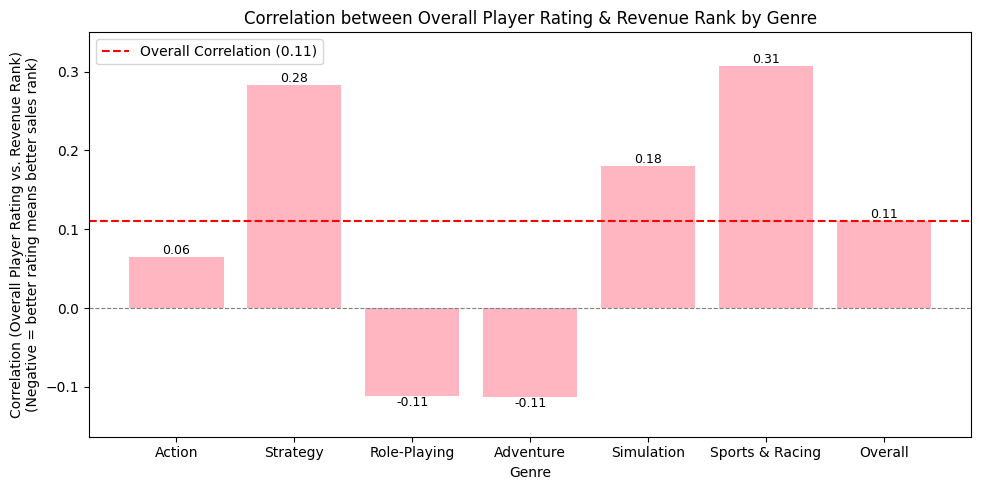

In [544]:
import matplotlib.pyplot as plt

# Prepare data for plotting: genre correlation coefficients + overall
genres = list(corr_results.keys())
corr_values = [corr_results[genre] for genre in genres]

# For aesthetics, add the "Overall" as a bar
genres_with_overall = genres + ['Overall']
corr_values_with_overall = corr_values + [overall_corr]

plt.figure(figsize=(10, 5))
bars = plt.bar(genres_with_overall, corr_values_with_overall, color='skyblue')
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", 
                 ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

plt.title(("Correlation between Overall Player Rating & Revenue Rank by Genre"))
plt.ylabel(("Correlation (Overall Player Rating vs. Revenue Rank)\n(Negative = better rating means better sales rank)"))
plt.xlabel("Genre")
plt.ylim(min(-1, min([v for v in corr_values_with_overall if not np.isnan(v)])-0.1), 1)
plt.tight_layout()
# Update legend to include the overall correlation value
plt.axhline(y=overall_corr, color='red', linestyle='--', linewidth=1.5, 
            label=f"Overall Correlation ({overall_corr:.2f})")
# Change the bar color to a light pink
bars = plt.bar(genres_with_overall, corr_values_with_overall, color='#FFB6C1')
plt.legend()
plt.legend()
plt.ylim(min(-0.1, min([v for v in corr_values_with_overall if not np.isnan(v)])-0.05), 0.35)
plt.show()


In [501]:
# Calculate correlation between overall_player_rating_numeric and Sales Rank (per genre and overall)

# Clean-up: get only those with non-null overall_player_rating_numeric & relevant main genres for sales (not revenue)
sales_df = final_df[
    (final_df['rank_type'] == 'Sales') &
    (final_df['genre'].isin(main_genres)) &
    (final_df['overall_player_rating_numeric'].notnull())
].copy()

# Remove duplicates by keeping the top (lowest rank) entry for each game per genre if duplicates exist
sales_df_nodup = (
    sales_df
    .sort_values(['genre', 'game_name', 'rank'])
    .drop_duplicates(subset=['genre', 'game_name'], keep='first')
)

# Now, check the correlation for each genre
sales_corr_results = {}
for genre in main_genres:
    genre_df = sales_df_nodup[sales_df_nodup['genre'] == genre]
    if len(genre_df) > 1:
        corr = genre_df['overall_player_rating_numeric'].corr(genre_df['rank'])
        sales_corr_results[genre] = corr
    else:
        sales_corr_results[genre] = np.nan  # Not enough data

# Calculate overall correlation across all genres
if len(sales_df_nodup) > 1:
    sales_overall_corr = sales_df_nodup['overall_player_rating_numeric'].corr(sales_df_nodup['rank'])
else:
    sales_overall_corr = np.nan

# Print sales rank correlation summary
print("Correlation between overall_player_rating_numeric and Sales Rank (per genre):")
for genre, corr in sales_corr_results.items():
    print(f"  {genre}: {corr:.3f}")

print(f"\nOverall correlation (across all genres): {sales_overall_corr:.3f}")
print("\nNote:")
print("  - 'overall_player_rating_numeric': 1=worst, 7=best")
print("  - 'rank': 1=best, higher=lower sales rank")
print("So NEGATIVE correlation means better-rated games tend to have *better sales rank* (closer to 1).")


Correlation between overall_player_rating_numeric and Sales Rank (per genre):
  Action: 0.021
  Strategy: 0.103
  Role-Playing: -0.349
  Adventure: -0.102
  Simulation: 0.102
  Sports & Racing: 0.149

Overall correlation (across all genres): 0.018

Note:
  - 'overall_player_rating_numeric': 1=worst, 7=best
  - 'rank': 1=best, higher=lower sales rank
So NEGATIVE correlation means better-rated games tend to have *better sales rank* (closer to 1).


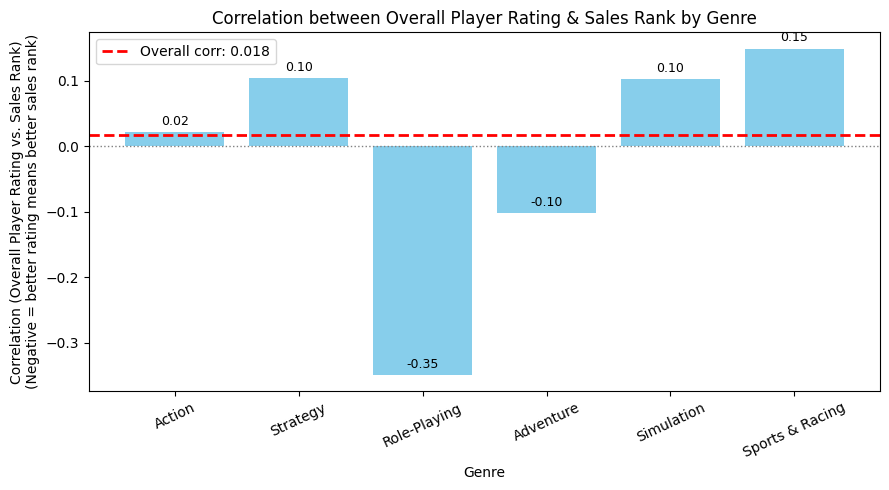

In [543]:
import matplotlib.pyplot as plt

# Prepare data for visualization
genres = list(sales_corr_results.keys())
correlations = [sales_corr_results[g] for g in genres]

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(genres, correlations, color='skyblue')

# Highlight overall correlation as a horizontal line
ax.axhline(sales_overall_corr, color='red', linestyle='--', lw=2, label=f"Overall corr: {sales_overall_corr:.3f}")

# Annotate bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    label_corr = f"{corr:.2f}" if not np.isnan(corr) else "n/a"
    ax.annotate(label_corr,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

ax.set_ylabel("Correlation (Overall Player Rating vs. Sales Rank)\n(Negative = better rating means better sales rank)")
ax.set_xlabel("Genre")
ax.set_title("Correlation between Overall Player Rating & Sales Rank by Genre")
ax.legend()
plt.xticks(rotation=25)
plt.tight_layout()


# Add a horizontal line at y=0 for reference
ax.axhline(0.0, color='gray', linestyle=':', linewidth=1)

# To make sure the legend doesn't have duplicates, we only want unique handles and labels
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys())
plt.show()



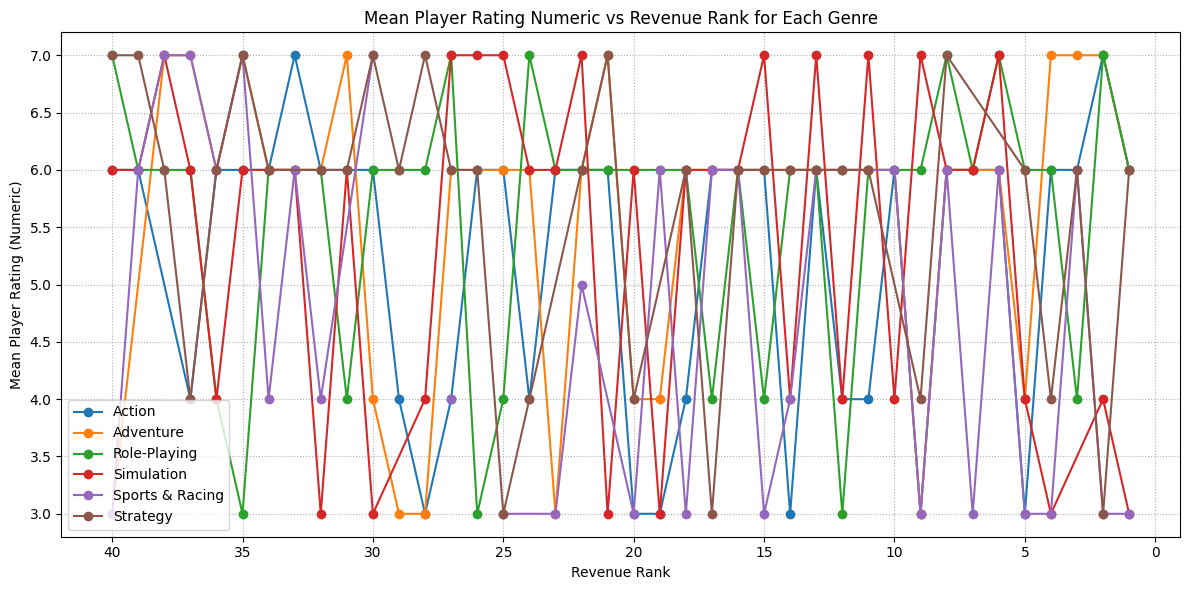

In [491]:
# Group by genre and revenue rank and calculate the mean of player rating numeric
revenue_mean_rating = final_df[final_df['rank_type'] == 'Revenue'].copy()
revenue_mean_rating = revenue_mean_rating.drop_duplicates(subset=['game_name', 'genre'])
grouped = revenue_mean_rating.groupby(['genre', 'rank'])['overall_player_rating_numeric'].mean().reset_index()

# Pivot for heatmap (optional) or lineplot for each genre
plt.figure(figsize=(12, 6))
for genre in grouped['genre'].unique():
    data = grouped[grouped['genre'] == genre]
    plt.plot(data['rank'], data['overall_player_rating_numeric'], marker='o', label=genre)

plt.xlabel("Revenue Rank")
plt.ylabel("Mean Player Rating (Numeric)")
plt.title("Mean Player Rating Numeric vs Revenue Rank for Each Genre")
plt.legend()
plt.gca().invert_xaxis()  # So rank 1 is leftmost (best)
plt.grid(True, linestyle=':')
plt.tight_layout()
# Drop duplicates in the grouped DataFrame if any (for safety)
grouped = grouped.drop_duplicates()
plt.show()
